# Max Planck Weather Dataset Analysis

## Background
This assignment analyzes performance of data from Max Planck Weather Dataset which is Time-Series analysis and forecasting with weather data. 

### The Dataset
This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes, beginning in 2003. For efficiency, you will use only the data collected between 2009 and 2016.

The complete dataset consists of 1 CSV files (max_planck_weather_ts.csv), containing:
- About 420,000 samples
- Collected over 7 years
- Sampled every 10 minute
- Over 14 attributes

Data accessibility and further information: https://www.kaggle.com/datasets/arashnic/max-planck-weather-dataset/data





In [2]:
# Initial setup cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from datetime import datetime, timedelta


# Configure plotting defaults
# plt.style.use('seaborn')
plt.rcParams.update({
    'figure.figsize': [12, 8],
    'figure.dpi': 150, # Screen resolution
    'figure.autolayout': True,  # Auto-adjust layout
    'figure.constrained_layout.use': True,  # Better spacing
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'font.size': 12
})

# Set Seaborn style for better visualizations
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

np.random.seed(100) # Set seed for reproducibility

## 1.1 Data Preprocessing and Basic Analysis

1. Basic statistical analysis using pandas 

2. Original data quality analysis (including visualization)

3. Data preprocessing

4. Preprocessed vs original data visual analysis 

In [4]:
#Data loading 

def load_weather_data(file_path: str) -> pd.DataFrame:
    """Load and prepare test system performance data.
    
    Parameters
    ----------
    file_path : str
        Path to the CSV data file
        
    Returns
    -------
    pd.DataFrame
         Dataframe with columns:
            - Date Time : Date-time reference
            - p (mbar) : Atmospheric pressure in millibars
            - T (degC) : Temperature in Celsius
            - Tpot (K) : Temperature in Kelvin
            - Tdew (degC) : Dew Point temperature in Celsius
            - rh (%) : Relative Humidity (%)
            - VPmax (mbar) : Saturation vapor pressure
            - VPact (mbar) : Vapor pressure
            - VPdef (mbar) : Vapor pressure deficit
            - sh (g/kg) : Specific humidity
            - H2OC (mmol/mol) : Water vapor concentration
            - rho (g/m**3) : Airtight
            - wv (m/s) : Wind speed
            - max. wv (m/s) : Maximum wind speed
            - wd (deg) : Wind direction in degrees
    """
     #Reading CSV file
    data = pd.read_csv(file_path)

    # Convert 'Datetime' column to datetime format with day-first assumption
    try:
        data['Date Time'] = pd.to_datetime(data['Date Time'], dayfirst=True)
    except Exception as e:
        print(f"Error converting 'Datetime' column to datetime: {e}")
        raise
    #Setting date time column as index
    #data['datetime'] = pd.to_datetime(data['timestamp'], unit='s',errors='coerce')
    data.set_index('Date Time', inplace=True)
    
    return data

In [5]:
# Basic statistical analysis
data = load_weather_data('max_planck_weather_ts.csv')

print("Data Overview:")
print(f"Time range: {data.index.min()} to {data.index.max()}")
print(f"Number of samples: {len(data):,}")
data.describe()   
#data.head()

Data Overview:
Time range: 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Number of samples: 420,551


p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean      989.212776       9.450147     283.492743       4.955854   
std         8.358481       8.423365       8.504471       6.730674   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean       76.008259      13.576251       9.533756       4.042412   
std        16.476175       7.739020       4.184164       4.896851   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.780000       6.210000       0.870000   
50%        79.300000      11.820000       8.860000       2.190000   
75%        89.400000      17.600000      12.350000       5.300000   
max       100.000000      63.770000      28.320000      46.010000   

           sh (g/kg)  H2OC (mmol/mol)   rho (g/m**3)       wv (m/s)  \
count  420551.000000    420551.000000  420551.000000  420551.000000   
mean        6.022408         9.640223    1216.062748       1.702224   
std         2.656139         4.235395      39.975208      65.446714   
min         0.500000         0.800000    1059.450000   -9999.000000   
25%         3.920000         6.290000    1187.490000       0.990000   
50%         5.590000         8.960000    1213.790000       1.760000   
75%         7.800000        12.490000    1242.770000       2.860000   
max        18.130000        28.820000    1393.540000      28.490000   

       max. wv (m/s)       wd (deg)  
count  420551.000000  420551.000000  
mean        3.056555     174.743738  
std        69.016932      86.681693  
min     -9999.000000       0.000000  
25%         1.760000     124.900000  
50%         2.960000     198.100000  
75%         4.740000     234.100000  
max        23.500000     360.000000

Missing values per column:
 p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64
Number of duplicate rows:  329


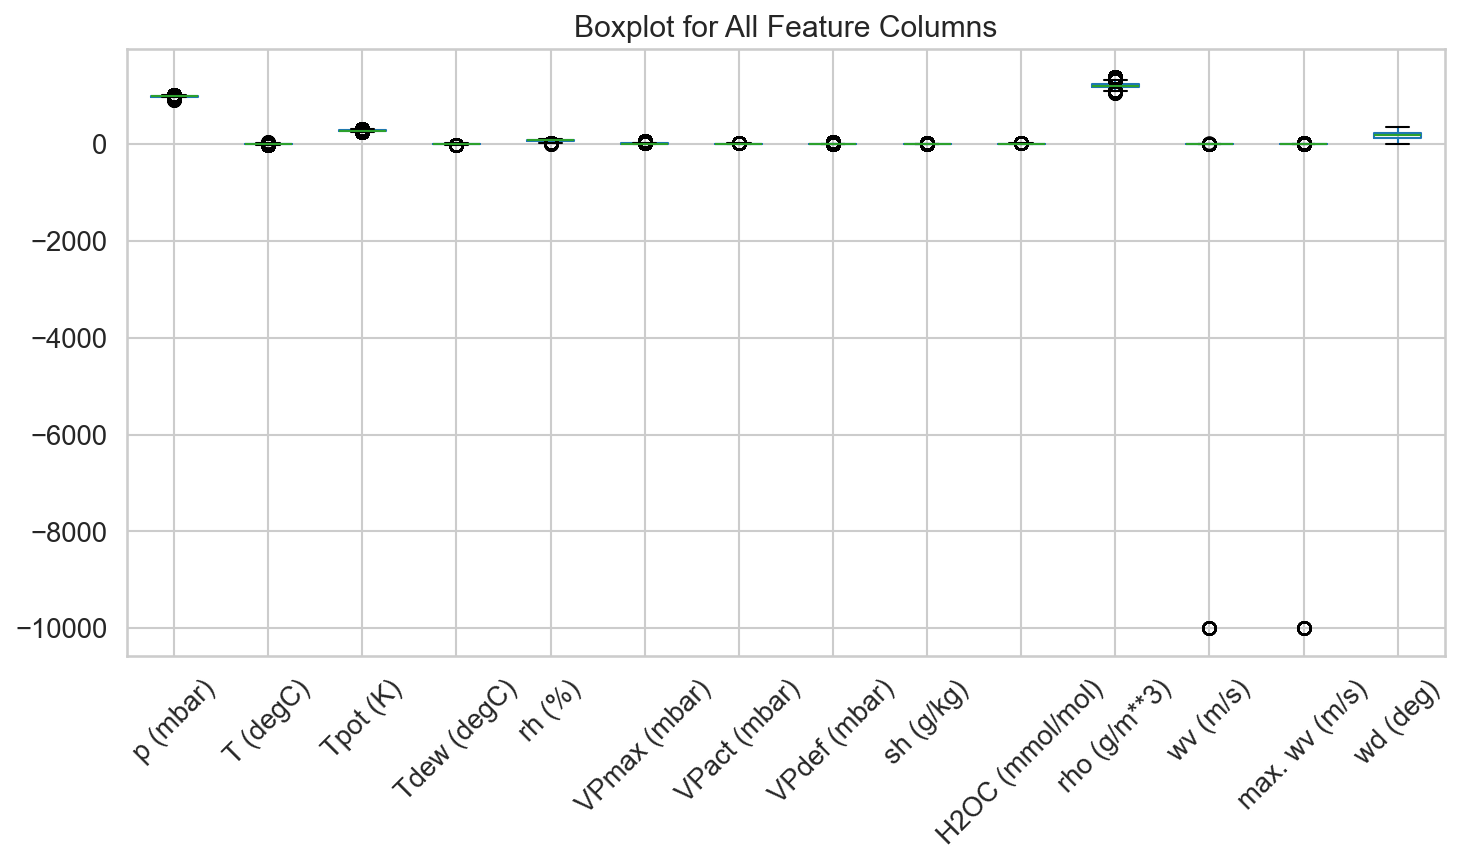

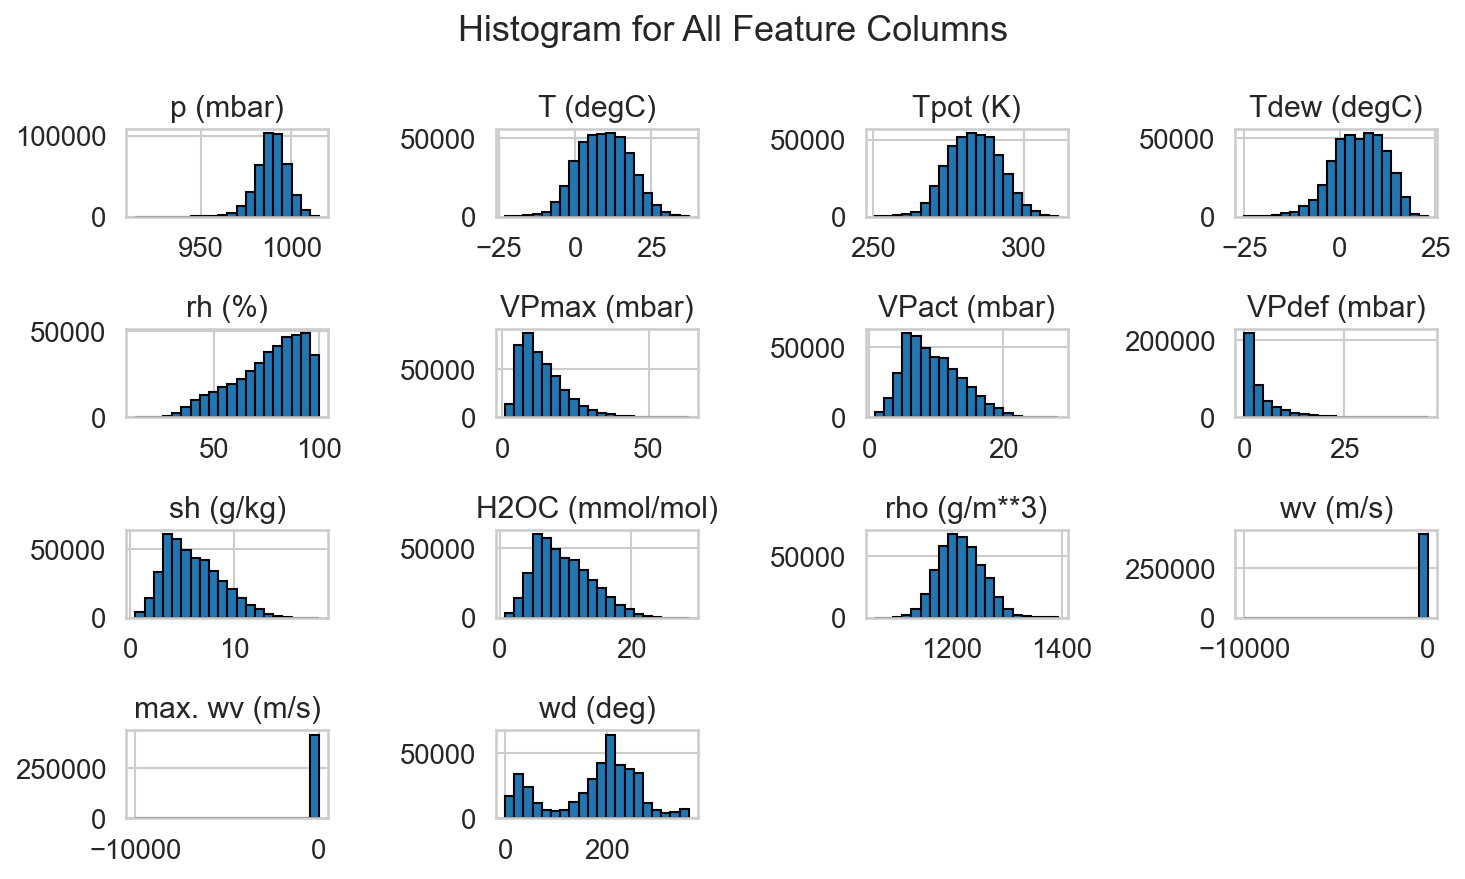

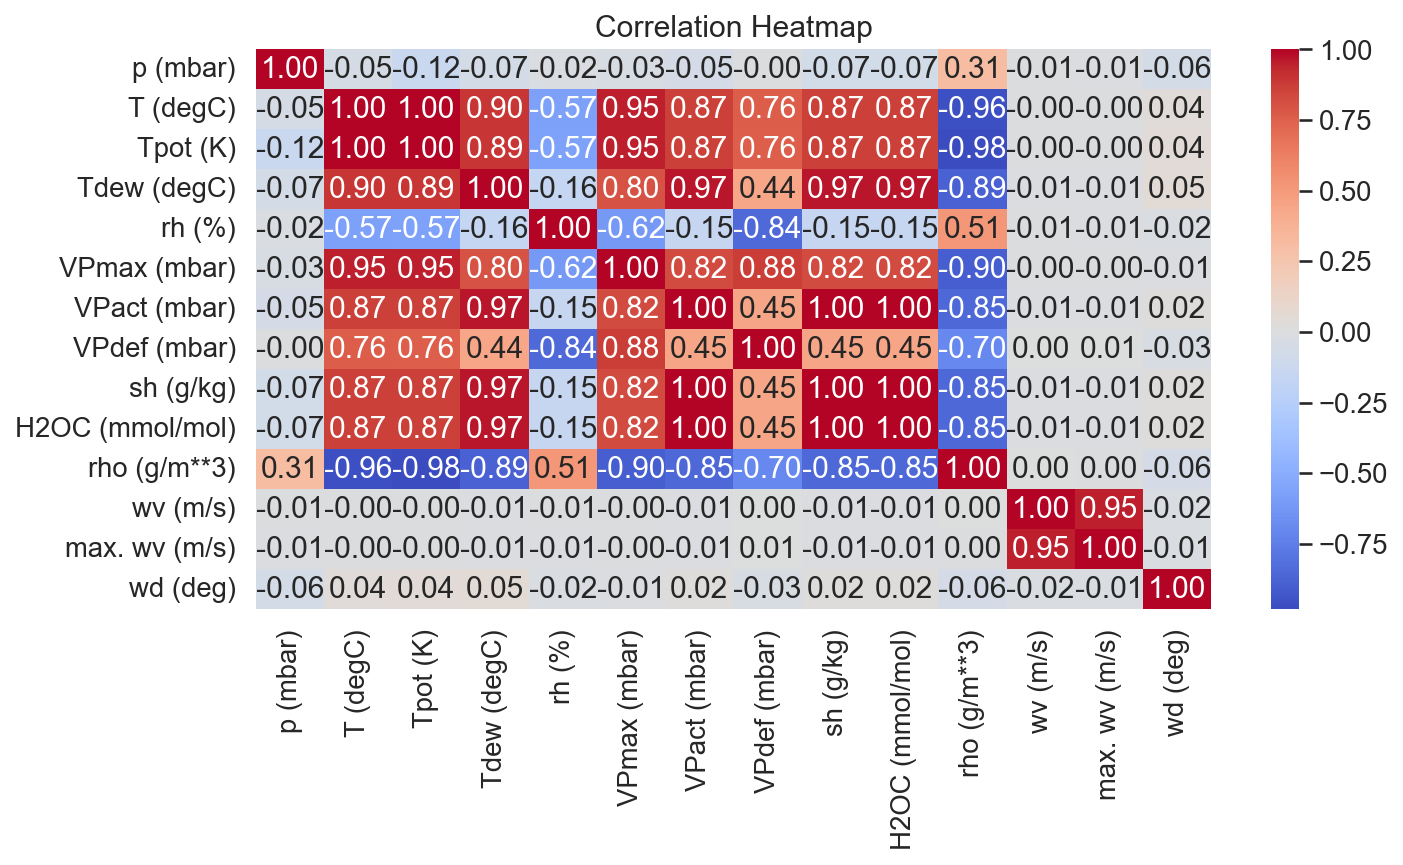

In [6]:
# Original data quality analysis (including visualization)

# Missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Duplicates
print("Number of duplicate rows: ", data.duplicated().sum())

# Data types
#print(data.dtypes)

# Outliers
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(10, 6))
data[numerical_cols].boxplot()
plt.title("Boxplot for All Feature Columns")
plt.xticks(rotation=45)
plt.show()

# Histograms
data[numerical_cols].hist(bins=20, figsize=(10, 6), edgecolor="black")
plt.suptitle("Histogram for All Feature Columns")
plt.show()

# Correlation heatmap
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


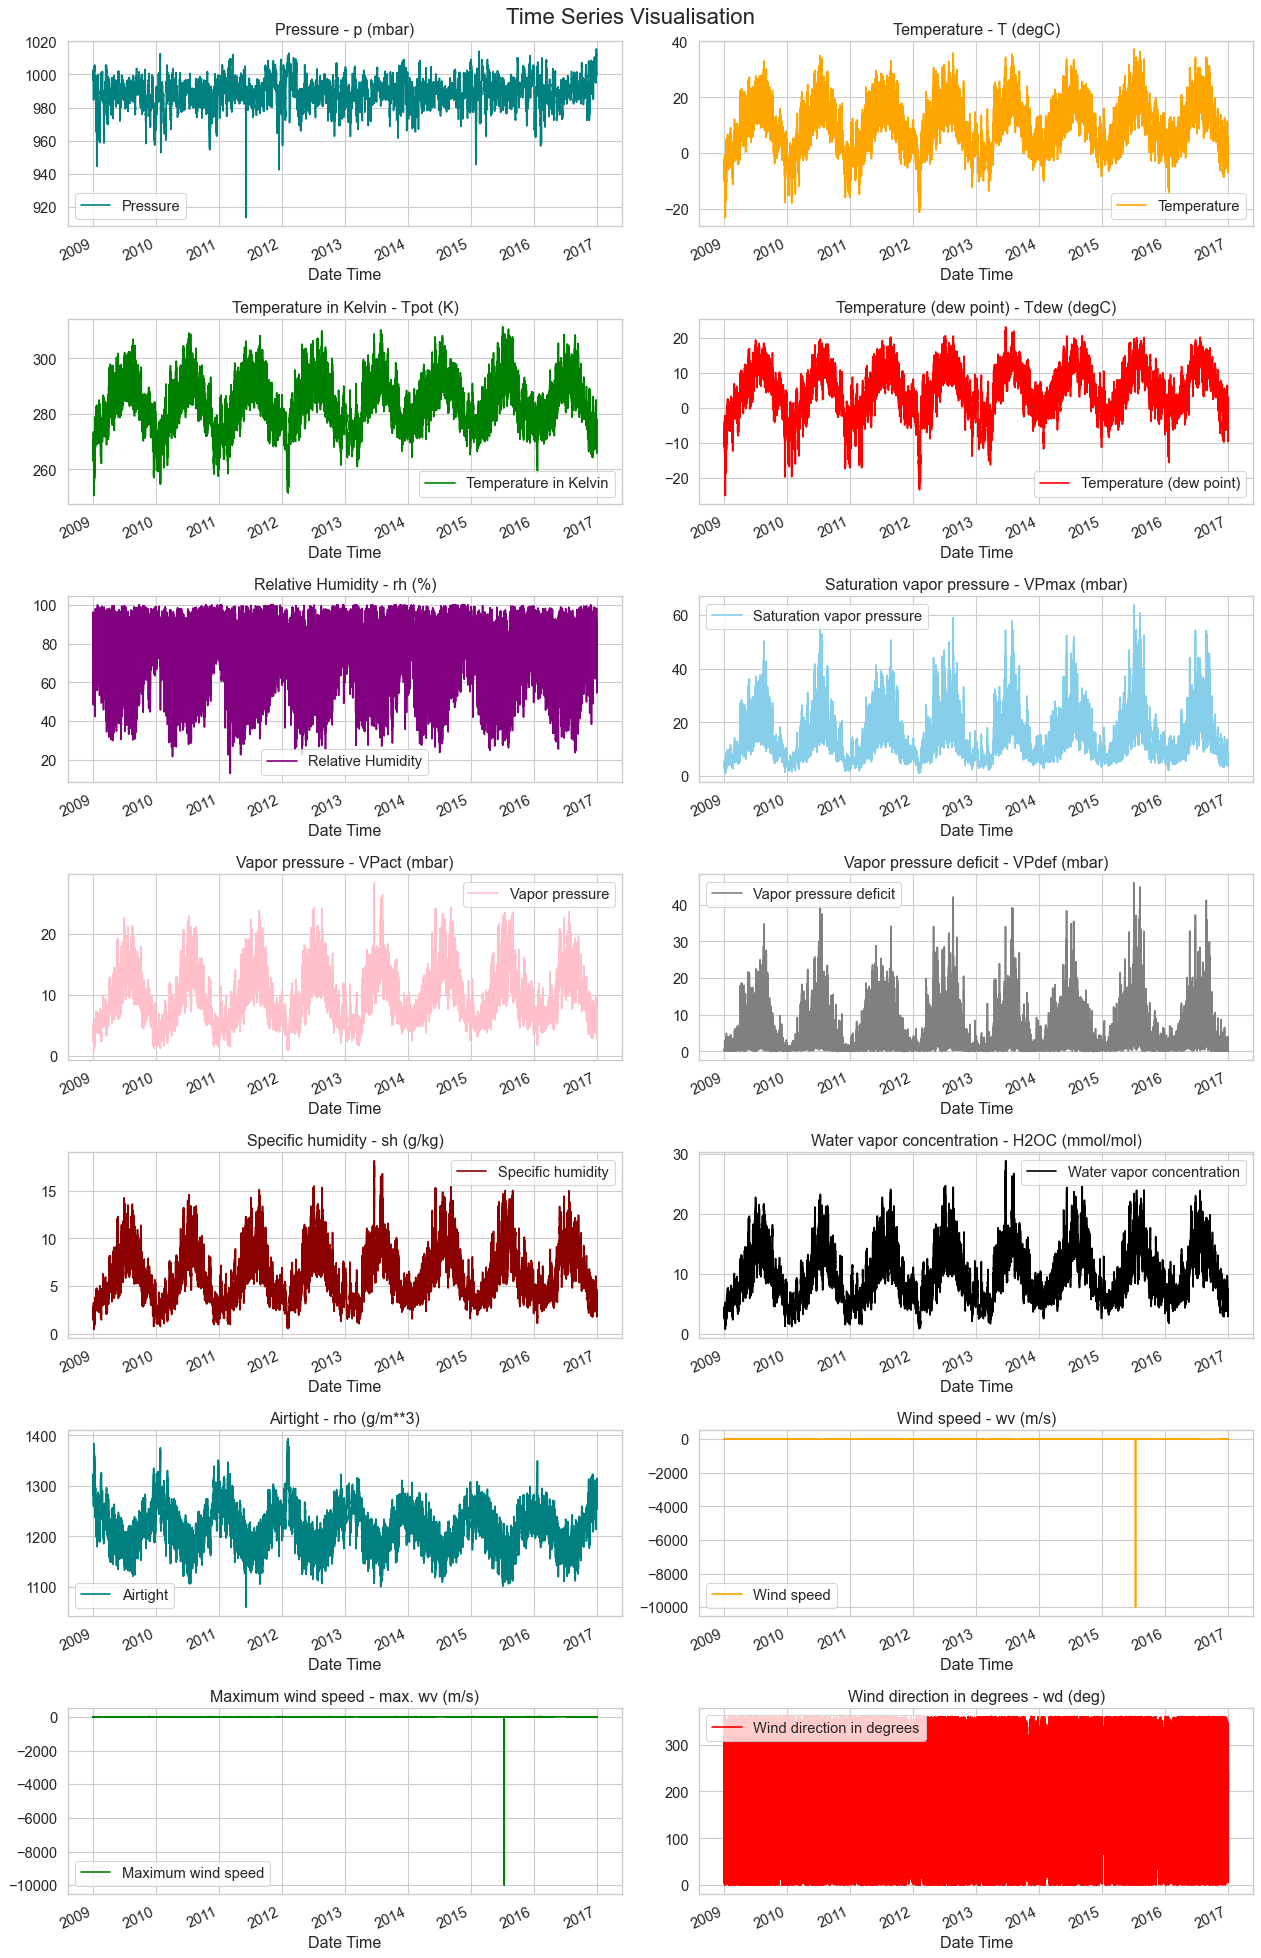

In [7]:
# Raw data Visualisation
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "teal",
    "orange",
    "green",
    "red",
    "purple",
    "skyblue",
    "pink",
    "gray",
    "darkred",
    "k",
]

def data_visualization(data):
    #'Date Time' column is already set as the index
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(16, 25), dpi=80, facecolor="w", edgecolor="k"
    )
    fig.suptitle("Time Series Visualisation", fontsize=20)
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % len(colors)]
        ax = data[key].plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

data_visualization(data)

In [8]:
# Data Preprocessing
def preprocess_weather_data(df: pd.DataFrame):
    """Preprocess weather data for analysis.
    
    Parameters
    ----------
    df : pd.DataFrame
        Raw weather data with required metrics.
        
    Returns
    -------
    df_original : pd.DataFrame
        Original data copy.
    df_cleaned : pd.DataFrame
        Cleaned data with:
        - Invalid values removed
        - Duplicates handled
        - Outliers removed
        - Missing values interpolated
    """
    # Store original data
    df_original = df.copy()
    
    # Define columns with known invalid values - Analysing the basic statistics
    invalid_value_columns = ['wv (m/s)', 'max. wv (m/s)']
    
    # 1. Handle invalid values
    for column in invalid_value_columns:
        if column in df.columns:
            df[column] = df[column].replace(-9999, np.nan)

    # 2. Handle duplicates
    df = df.drop_duplicates()

    # 3. Remove outliers using the IQR method
    def remove_outliers_iqr(data: pd.DataFrame, column: str) -> pd.Series:
        """Remove outliers using the IQR method."""
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        valid_mask = (data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)
        return data[column].where(valid_mask, np.nan)

    for column in df.select_dtypes(include=[np.number]).columns:
        df.loc[:, column] = remove_outliers_iqr(df, column)


    # 4. Handle missing values using interpolation
    def handle_missing_values(data: pd.DataFrame, column: str, max_gap: int = 8) -> pd.Series:
        """Interpolate missing values with a limit on gap size."""
        return data[column].interpolate(method='linear', limit=max_gap)

    for column in df.columns:
        if column in df.select_dtypes(include=[np.number]).columns:
            df.loc[:,column] = handle_missing_values(df, column)

    # Cleaned Data: Drop rows with excessive NaNs
    df_cleaned = df.dropna()

    return df_original, df_cleaned

data_original, data_cleaned = preprocess_weather_data(data)
print(f"Original: {len(data_original):,}")
print(f"Cleaned: {len(data_cleaned):,}")

Original: 420,551
Cleaned: 380,695


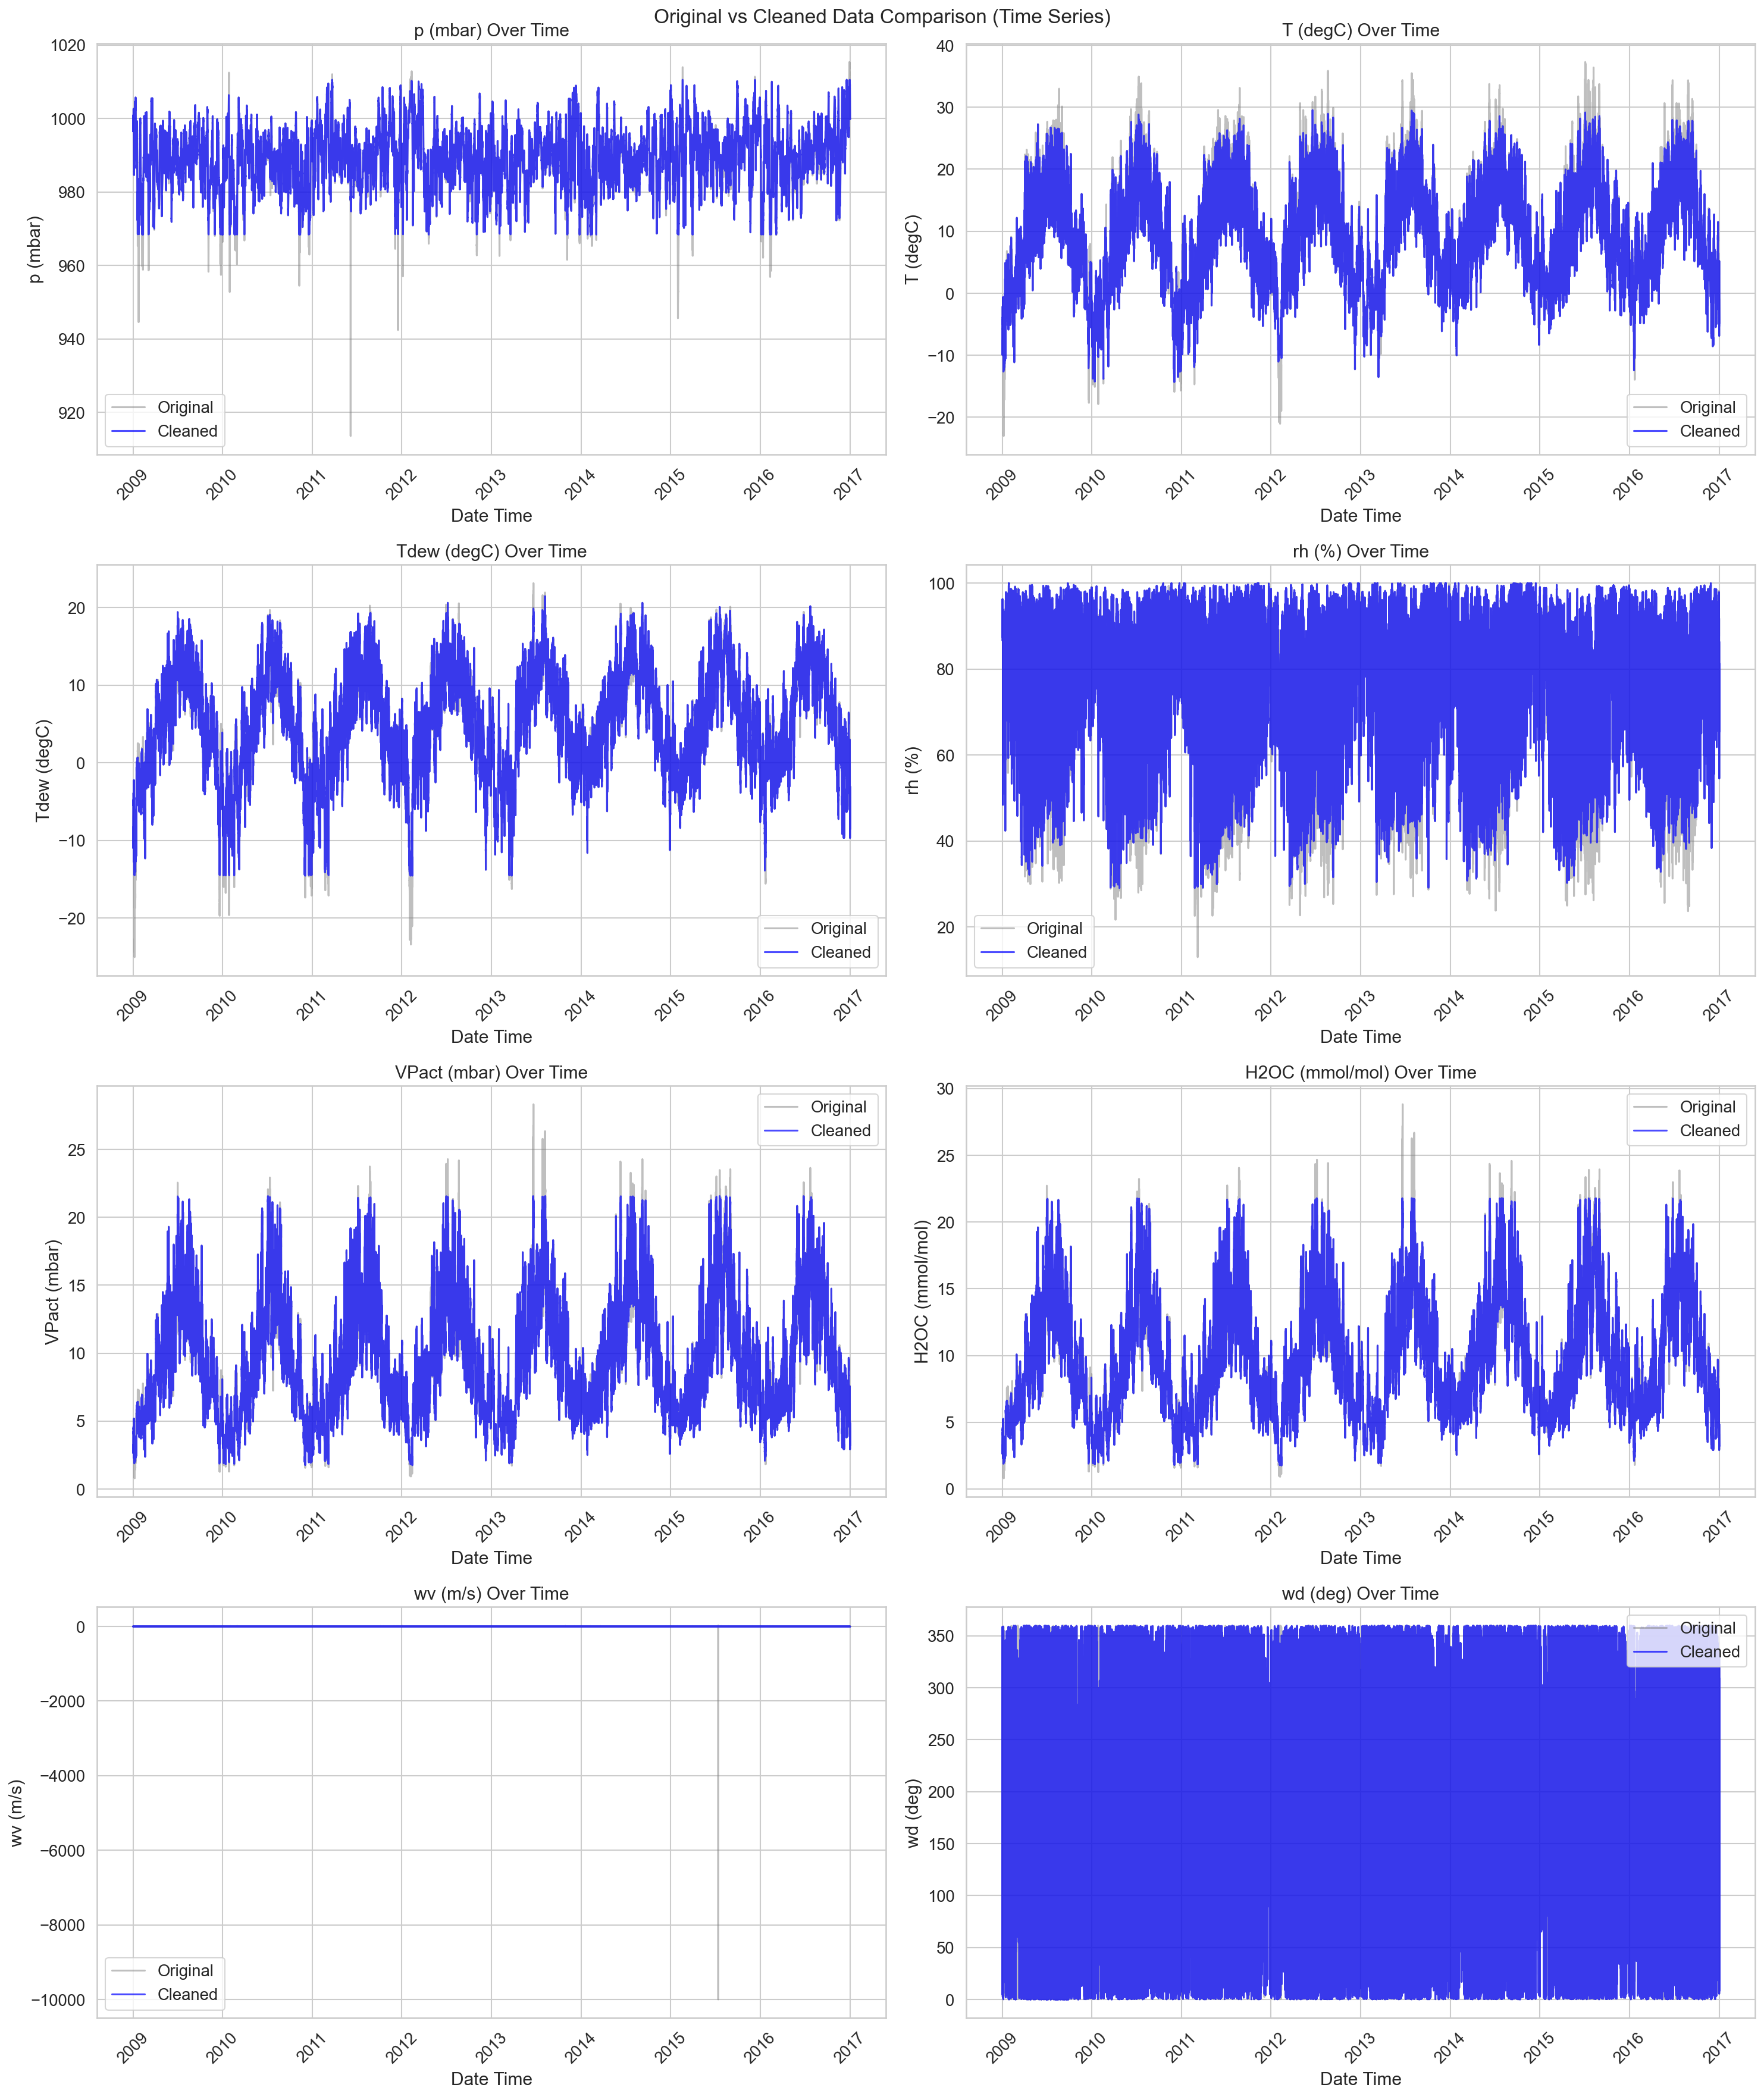

C:\Users\Clarissa Camasura\AppData\Local\Temp\ipykernel_1836\3100294072.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Clarissa Camasura\AppData\Local\Temp\ipykernel_1836\3100294072.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Clarissa Camasura\AppData\Local\Temp\ipykernel_1836\3100294072.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Clarissa Camasura\AppData\Local\Temp\ipykernel_1836\3100294072.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

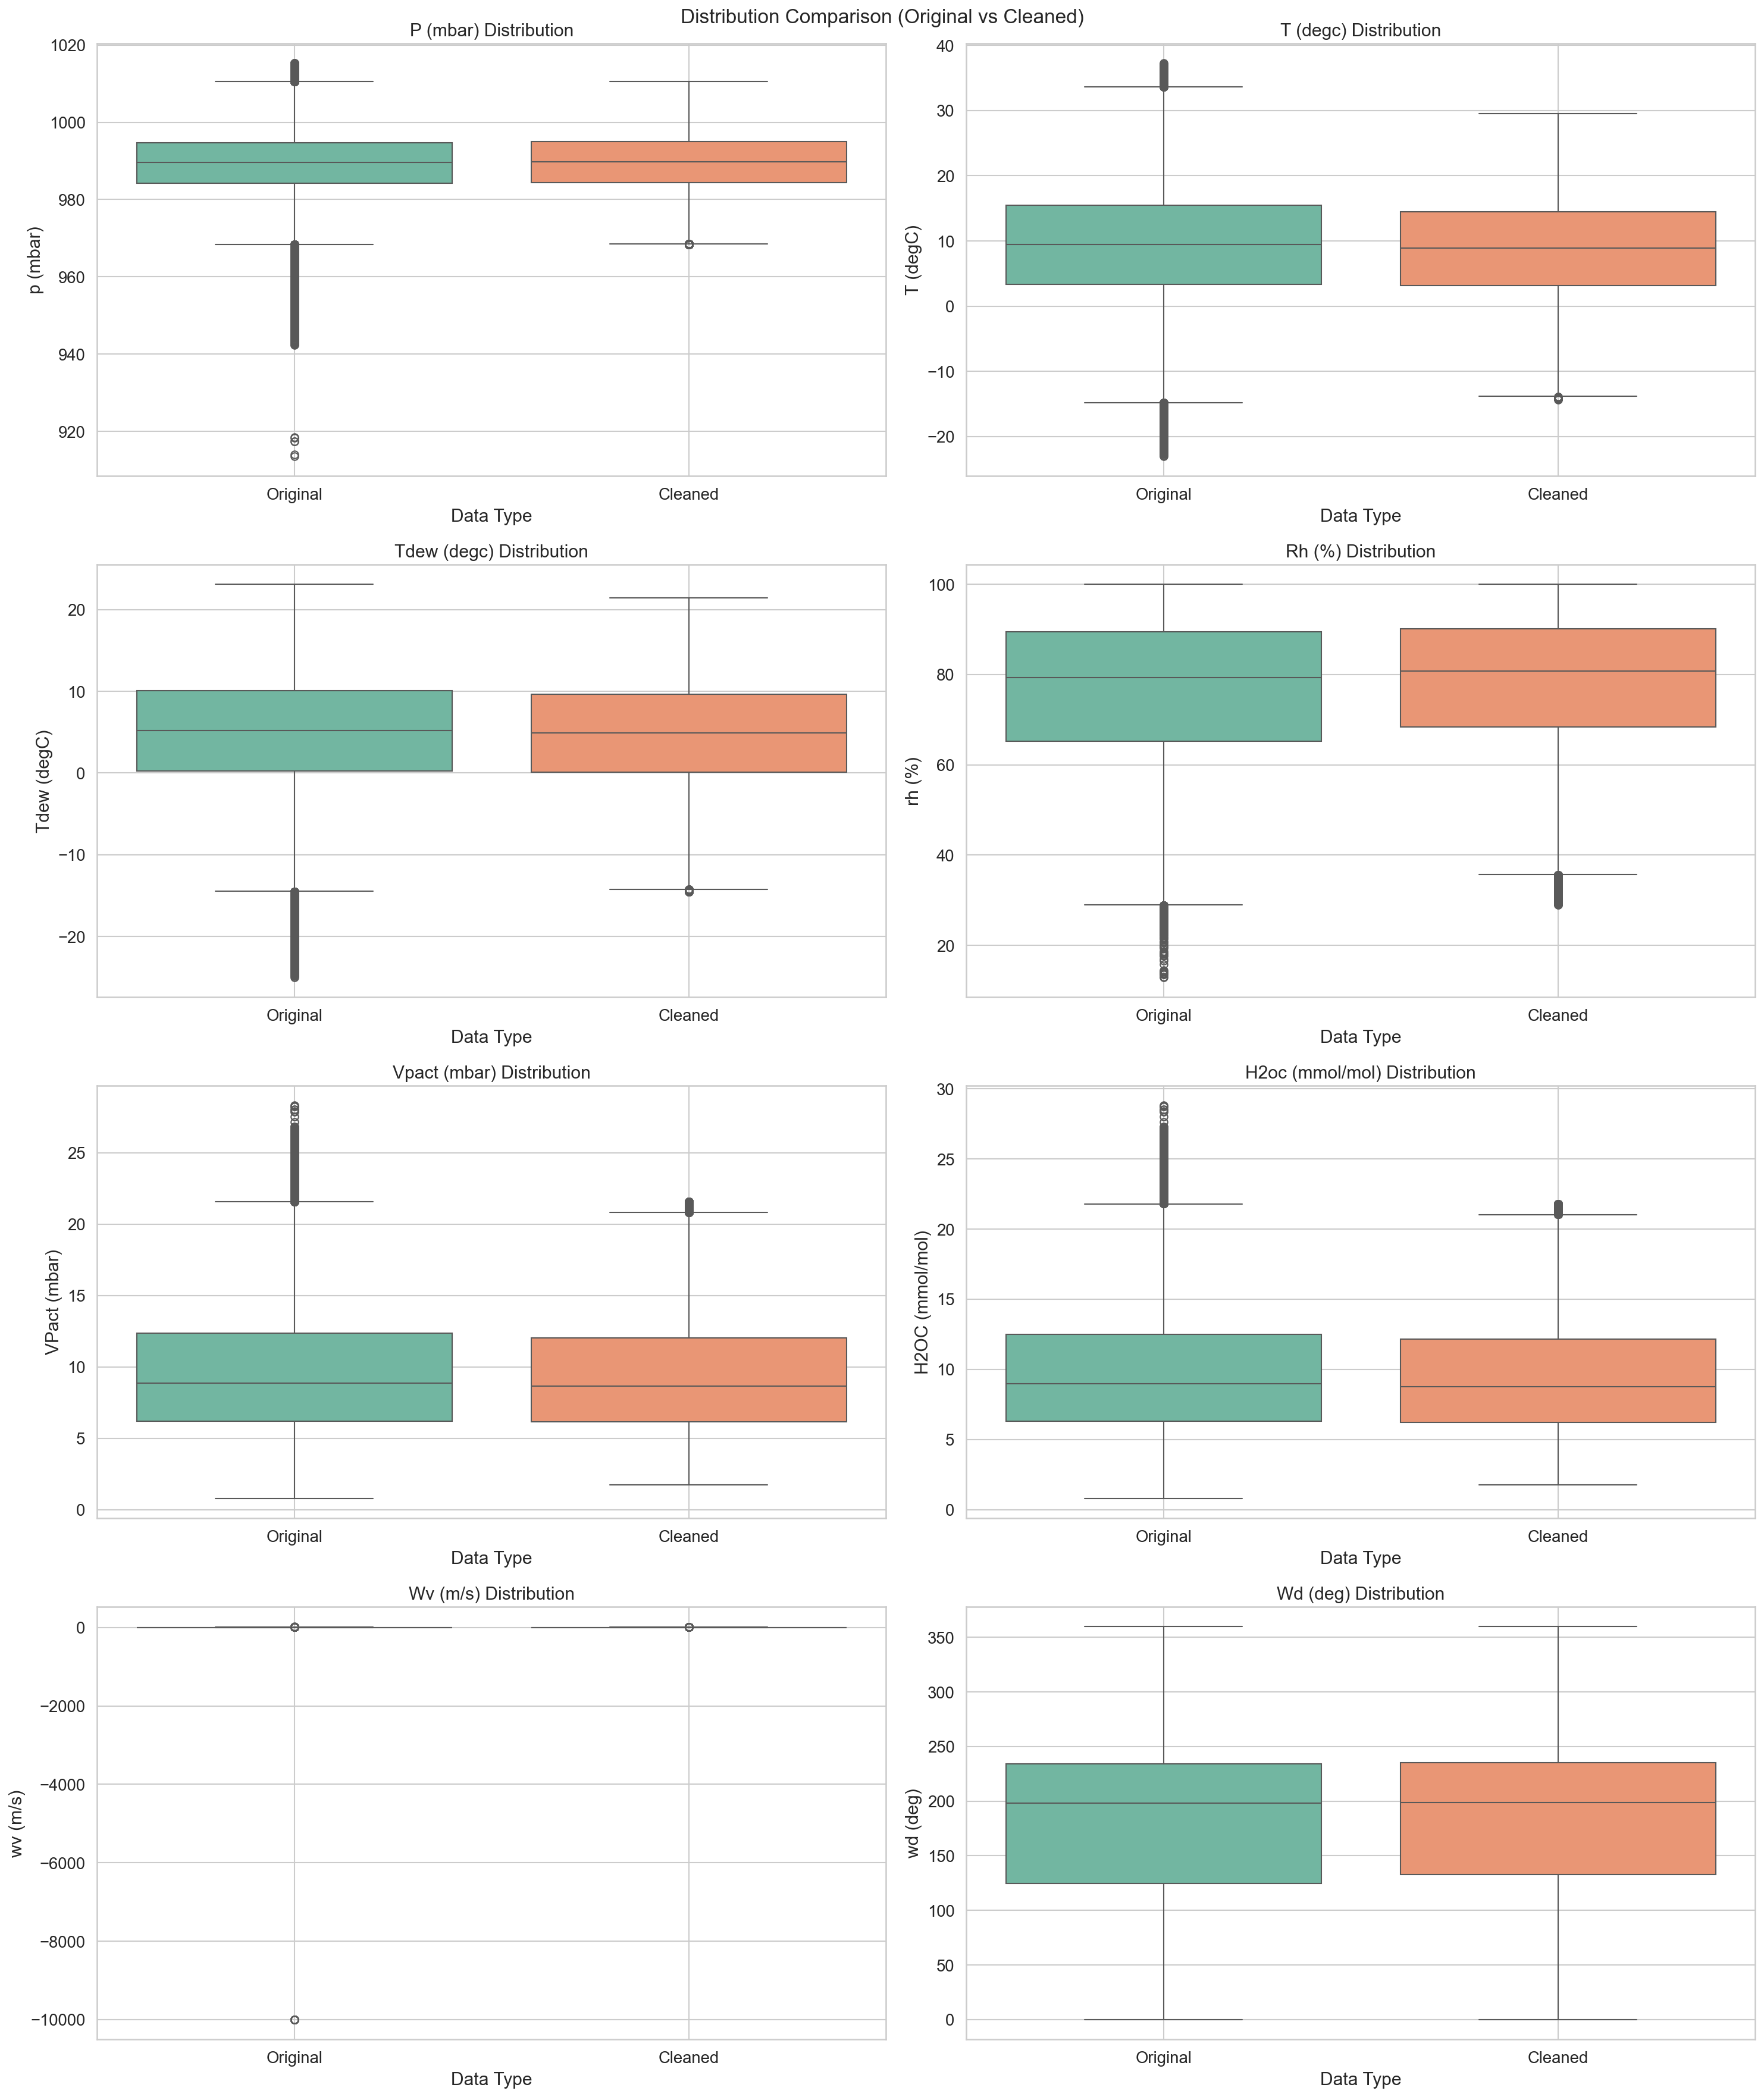

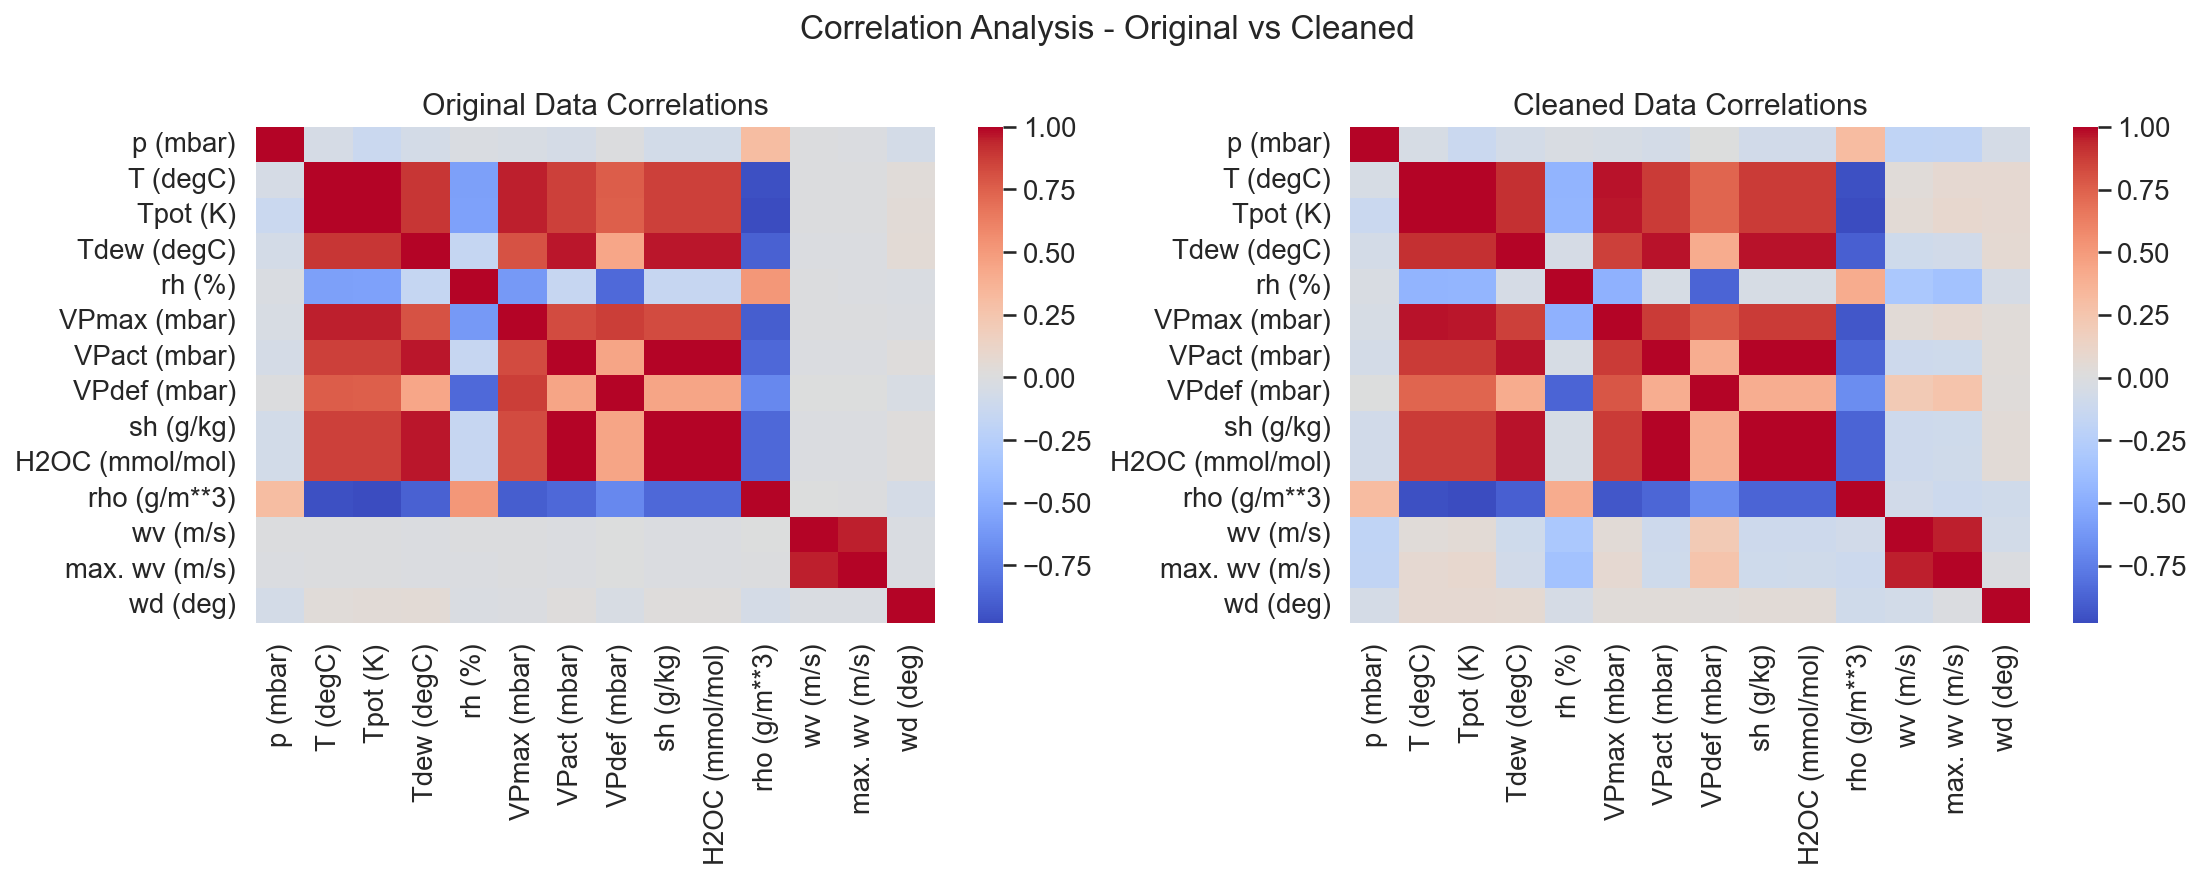

            Metric  Original Mean  Cleaned Mean  Original Std Dev  \
0         p (mbar)     989.212776    989.537724          8.358481   
1         T (degC)       9.450147      8.681053          8.423365   
2      Tdew (degC)       4.955854      4.768990          6.730674   
3           rh (%)      76.008259     78.147599         16.476175   
4     VPact (mbar)       9.533756      9.349178          4.184164   
5  H2OC (mmol/mol)       9.640223      9.450533          4.235395   
6         wv (m/s)       1.702224      1.983404         65.446714   
7         wd (deg)     174.743738    176.115477         86.681693   

   Cleaned Std Dev  Outliers Removed  \
0         7.815566              6750   
1         7.396501              1528   
2         6.414845              2603   
3        14.574894               742   
4         4.014489              1313   
5         4.064034              1373   
6         1.301956             14758   
7        85.934762                 0   

                 

In [9]:
# Preprocessed vs original data visual analysis
def compare_weather_data_versions(df_original: pd.DataFrame, df_cleaned: pd.DataFrame):
    """Compare original and cleaned weather data versions using visualizations.
    
    Creates multiple plots comparing the original and cleaned data:
    - Time series comparison of selected metrics
    - Daily patterns before and after cleaning
    - Correlation analysis (all metrics)
    - Box plot for distribution comparisons
    - Justification table for cleaning
    
    Parameters:
    df_original: Original unprocessed weather data.
    df_cleaned: Cleaned and processed weather data.
    """
    # Selected metrics for analysis
    metrics = ['p (mbar)', 'T (degC)', 'Tdew (degC)', 'rh (%)', 'VPact (mbar)', 'H2OC (mmol/mol)', 'wv (m/s)', 'wd (deg)']

    # 1. Time Series Comparison (Original vs Cleaned)
    fig, axes = plt.subplots(len(metrics)//2 + len(metrics)%2, 2, figsize=(20, len(metrics) * 3))
    fig.suptitle('Original vs Cleaned Data Comparison (Time Series)', fontsize=16)
    axes = axes.flatten()
    for i, metric in enumerate(metrics):
        axes[i].plot(df_original.index, df_original[metric], color='gray', alpha=0.5, label='Original')
        axes[i].plot(df_cleaned.index, df_cleaned[metric], color='blue', alpha=0.7, label='Cleaned')
        axes[i].set_title(f'{metric} Over Time')
        axes[i].set_xlabel('Date Time')
        axes[i].set_ylabel(metric)
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)

    for ax in axes[len(metrics):]:  # Hide any unused subplots
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

    # 2. Box Plot for Distribution Comparisons

    # Create a combined DataFrame for comparison
    df_original_copy = df_original[metrics].copy()
    df_original_copy['State'] = 'Original'
    df_cleaned_copy = df_cleaned[metrics].copy()
    df_cleaned_copy['State'] = 'Cleaned'

    # Concatenate original and cleaned DataFrames
    df_dist = pd.concat([df_original_copy, df_cleaned_copy], ignore_index=True)

    
    fig, axes = plt.subplots(len(metrics)//2 + len(metrics)%2, 2, figsize=(20, len(metrics) * 3))
    fig.suptitle('Distribution Comparison (Original vs Cleaned)', fontsize=16)
    #axes = axes.flatten()
    for i, metric in enumerate(metrics):
        row, col = divmod(i, 2)
        sns.boxplot(
            data=df_dist,
            x= 'State',
            y=metric,
            ax=axes[row, col],
            palette = 'Set2'
        )
        axes[row, col].set_title(f'{metric.capitalize()} Distribution')
        axes[row, col].set_xlabel('Data Type')
        axes[row, col].set_ylabel(metric)
        axes[row, col].grid(True)

    for ax in axes[len(metrics):]:  # Hide any unused subplots
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

    # 3. Correlation Analysis (All Metrics)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Correlation Analysis - Original vs Cleaned', fontsize=16)

    sns.heatmap(df_original.corr(), annot=False, cmap='coolwarm', ax=ax1)
    ax1.set_title('Original Data Correlations')

    sns.heatmap(df_cleaned.corr(), annot=False, cmap='coolwarm', ax=ax2)
    ax2.set_title('Cleaned Data Correlations')

    plt.tight_layout()
    plt.show()

    # 4. Justification for Cleaning Process
    justifications = {
        'p (mbar)': "Cleaning ensured realistic pressure values by removing anomalies.",
        'T (degC)': "Temperature outliers caused by sensor errors were addressed.",
        'Tdew (degC)': "Removed unrealistic dew point values to improve accuracy.",
        'rh (%)': "Handled missing or extreme relative humidity values.",
        'VPact (mbar)': "Cleaned vapor pressure anomalies for better consistency.",
        'H2OC (mmol/mol)': "Interpolated missing water content values.",
        'wv (m/s)': "Removed invalid wind velocity values (-9999).",
        'wd (deg)': "Corrected wind direction anomalies for smoother data."
    }

    comparison = []
    for metric in metrics:
        original_stats = df_original[metric].describe()
        cleaned_stats = df_cleaned[metric].describe()

        # Calculate IQR for outlier removal justification
        q1_original, q3_original = original_stats['25%'], original_stats['75%']
        iqr_original = q3_original - q1_original
        outliers_original = ((df_original[metric] < (q1_original - 1.5 * iqr_original)) | 
                             (df_original[metric] > (q3_original + 1.5 * iqr_original))).sum()

        impact = {
            'Metric': metric,
            'Original Mean': original_stats['mean'],
            'Cleaned Mean': cleaned_stats['mean'],
            'Original Std Dev': original_stats['std'],
            'Cleaned Std Dev': cleaned_stats['std'],
            'Outliers Removed': outliers_original,
            'Justification': justifications[metric]
        }
        comparison.append(impact)

    # Convert to DataFrame for easier viewing
    comparison_df = pd.DataFrame(comparison)
    print(comparison_df)

#calling
compare_weather_data_versions(data_original, data_cleaned)


# 1.2 Visualization and Exploratory Analysis

• Time series visualizations (5 points)

• Distribution analysis with histograms (5 points)

• Correlation analysis and heatmaps (5 points)

• Daily pattern analysis (10 points)

• Summary of observed patterns - similar to True/False questions (5 points)


## Additional Analysis Plots
• Daily Distribution Box Plot

• Scatter Matrix

• Hex Bin Grid

In [11]:
#Daily Distribution Box Plot function
def plot_daily_distribution_boxplots(data):
    """
    Plots daily distribution box plots for T (degC), rh (%), p (mbar), wv (m/s), and wd (deg).
    """
    
    data['hour'] = data.index.hour
    #data.index = pd.to_datetime(data.index)
    #data['hour'] = data.index.hour  # Extract hour from datetime index

    features = {
        "T (degC)": "Temperature (°C)",
        "rh (%)": "Relative Humidity (%)",
        "p (mbar)": "Pressure (mbar)",
        "wd (deg)": "Wind Direction (degrees)"
    }
    
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 18), dpi=80)
    fig.suptitle("Daily Distribution Box Plots", fontsize=20)

    for i, (key, label) in enumerate(features.items()):
        row, col = divmod(i, 2)
        sns.boxplot(x='hour', y=key, data=data, ax=axes[row, col], palette='coolwarm')
        axes[row, col].set_title(f"Daily Distribution of {label}")
        axes[row, col].set_xlabel("Hour of Day")
        axes[row, col].set_ylabel(label)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [12]:
# Correlation Analysis
def plot_correlation_heatmap(data):
    """
    Plots the correlation heatmap for all numerical features in the dataset.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
    plt.title("Correlation Heatmap of Weather Metrics", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [13]:
# Hexbin Analysis
def plot_hexbin_grid(data):
    """
    Plots Hexbin plots for pairs of features to analyze density relationships.
    """
    features = {
        ("T (degC)", "wv (m/s)"): ("Temperature (°C)", "Wind Speed (m/s)"),
        ("p (mbar)", "rh (%)"): ("Pressure (mbar)", "Relative Humidity (%)"),
        ("T (degC)", "VPdef (mbar)"): ("Temperature (°C)", "Vapor Pressure Deficit (mbar)"),
        ("sh (g/kg)", "H2OC (mmol/mol)"): ("Specific Humidity (g/kg)", "Water Vapor Concentration (mmol/mol)"),
    }

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 18), dpi=80)
    fig.suptitle("Hexbin Plots for Feature Relationships", fontsize=20)

    for i, ((x_key, y_key), (x_label, y_label)) in enumerate(features.items()):
        row, col = divmod(i, 2)
        hb = data.plot.hexbin(
            x=x_key,
            y=y_key,
            gridsize=30,
            cmap="YlOrRd",
            reduce_C_function=np.mean,
            ax=axes[row, col]
        )
        axes[row, col].set_title(f"{x_label} vs {y_label}")
        axes[row, col].set_xlabel(x_label)
        axes[row, col].set_ylabel(y_label)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



In [14]:
# Distribution Analysis - Histogram
def plot_distribution_analysis(df: pd.DataFrame, metrics: list):
    """
    Plots histograms for distribution analysis of all metrics.
    
    Parameters:
    df : pd.DataFrame
        Dataset containing the metrics.
    metrics : list
        List of metrics (columns) to include in the analysis.
    """
    num_metrics = len(metrics)
    rows = (num_metrics // 2) + (num_metrics % 2)
    
    fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
    fig.suptitle("Distribution Histogram Analysis", fontsize=20)
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        sns.histplot(df[metric], bins=30, kde=True, ax=axes[i], color="blue")
        axes[i].set_title(f"Distribution of {metric}")
        axes[i].set_xlabel(metric)
        axes[i].set_ylabel("Frequency")
    
    # Hide any unused subplots
    for ax in axes[num_metrics:]:
        ax.set_visible(False)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [15]:
# Daily Pattern Analysis
def plot_daily_pattern(df: pd.DataFrame, metrics: list):
    """
    Plots daily patterns (mean ± std) for all metrics.
    
    Parameters:
    df : pd.DataFrame
        Dataset with DateTime index.
    metrics : list
        List of metrics (columns) to include in the analysis.
    """
    # Extract hour from the DateTime index
    df['hour'] = df.index.hour

    num_metrics = len(metrics)
    rows = (num_metrics // 2) + (num_metrics % 2)
    
    fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
    fig.suptitle("Daily Pattern Analysis", fontsize=20)
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        hourly_stats = df.groupby('hour')[metric].agg(['mean', 'std'])
        axes[i].plot(hourly_stats.index, hourly_stats['mean'], label='Mean', color='blue')
        axes[i].fill_between(
            hourly_stats.index,
            hourly_stats['mean'] - hourly_stats['std'],
            hourly_stats['mean'] + hourly_stats['std'],
            alpha=0.2,
            label='±1 Std Dev',
            color='blue'
        )
        axes[i].set_title(f"Daily Pattern of {metric}")
        axes[i].set_xlabel("Hour of Day")
        axes[i].set_ylabel(metric)
        axes[i].legend()
        axes[i].grid(True)
    
    # Hide any unused subplots
    for ax in axes[num_metrics:]:
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()


C:\Users\Clarissa Camasura\AppData\Local\Temp\ipykernel_1836\1174450832.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=key, data=data, ax=axes[row, col], palette='coolwarm')
C:\Users\Clarissa Camasura\AppData\Local\Temp\ipykernel_1836\1174450832.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=key, data=data, ax=axes[row, col], palette='coolwarm')
C:\Users\Clarissa Camasura\AppData\Local\Temp\ipykernel_1836\1174450832.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=key, data=data, ax=axes[ro

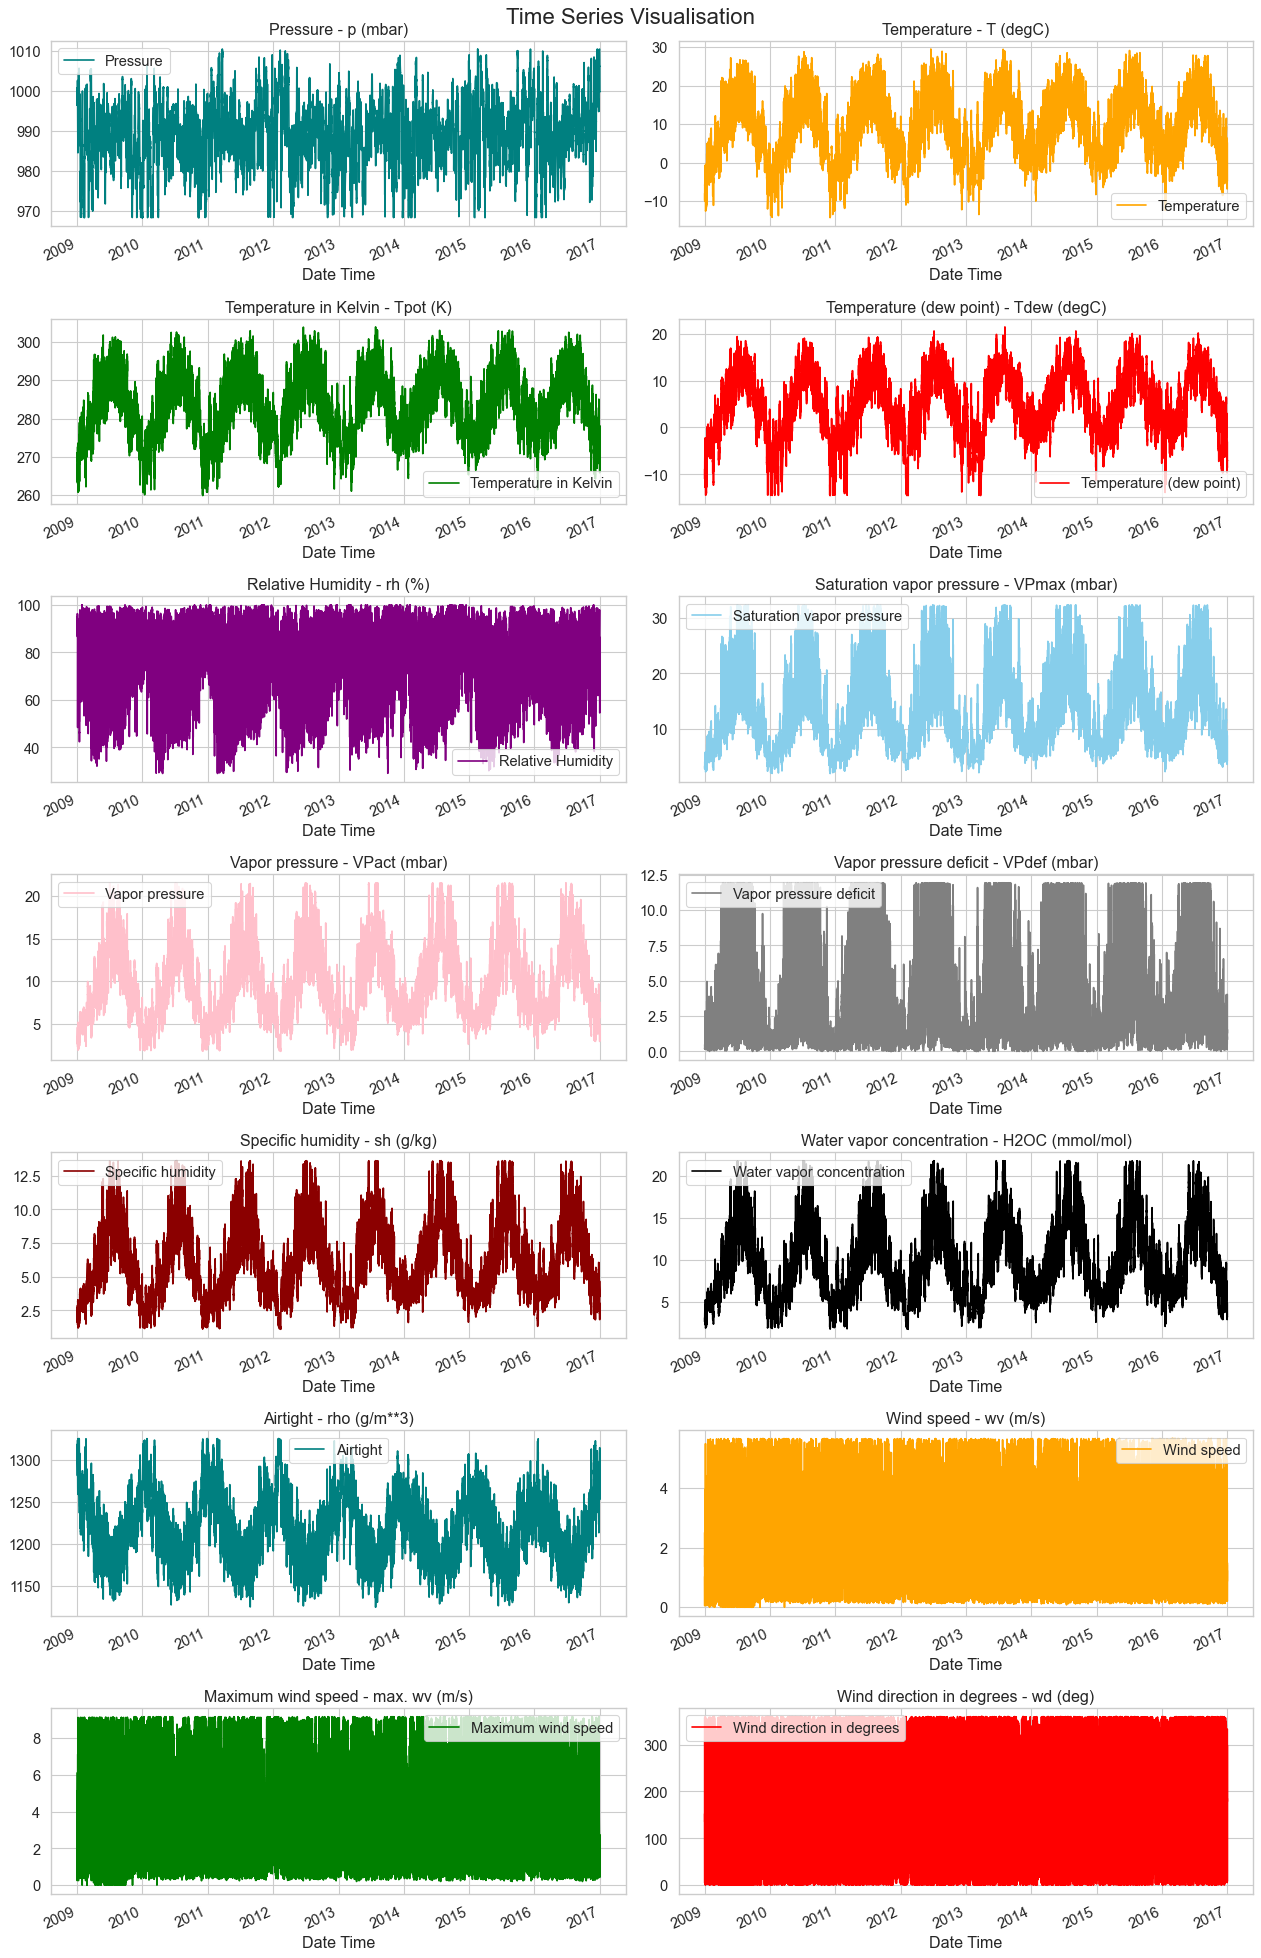

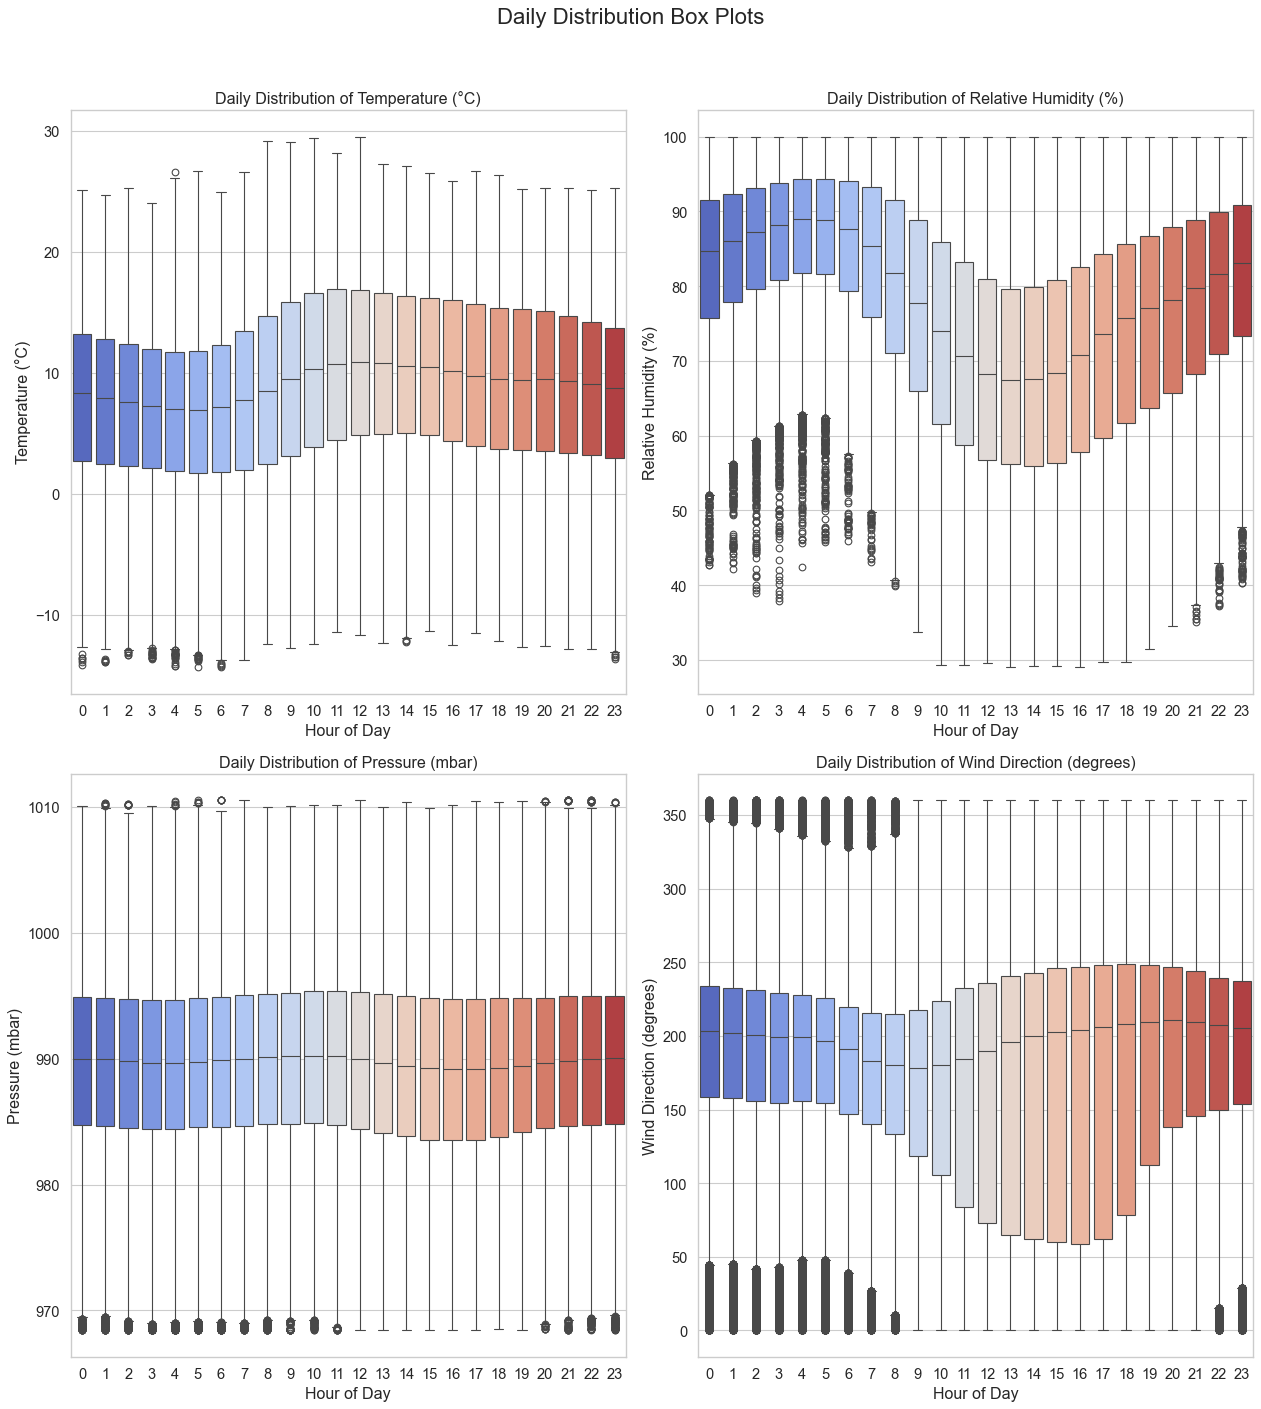

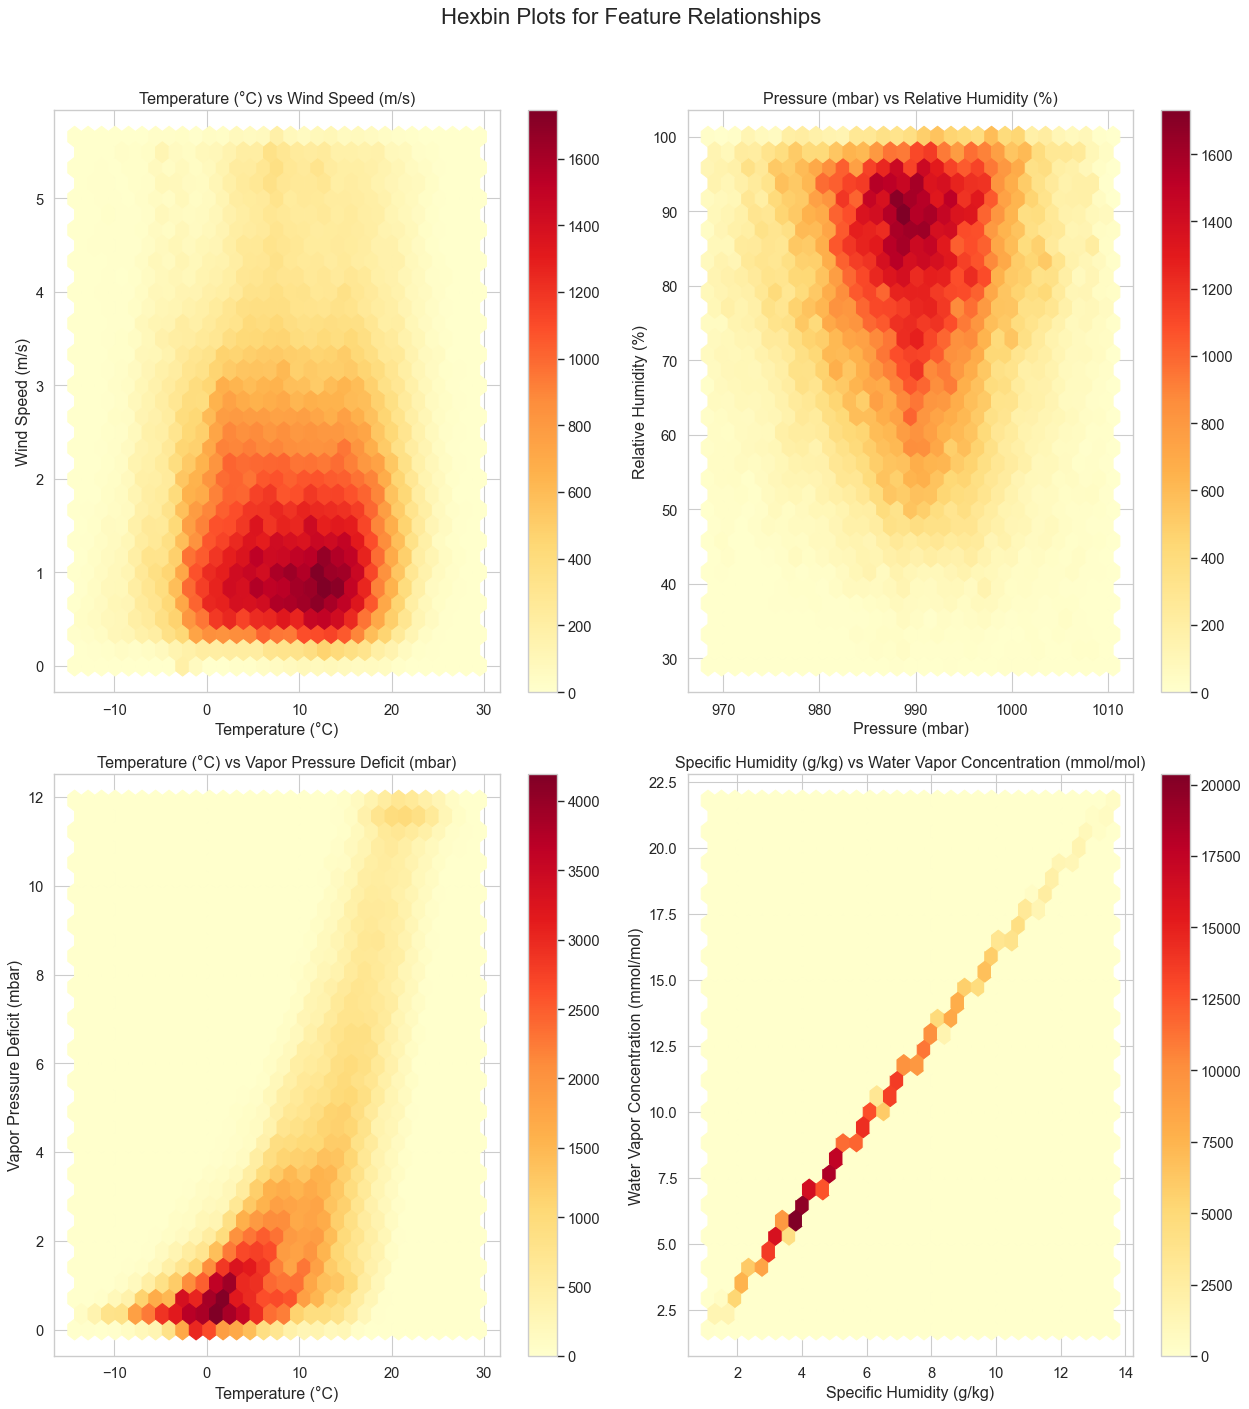

In [ ]:
data_visualization(data_cleaned)
plot_daily_distribution_boxplots(data_cleaned)
plot_hexbin_grid(data_cleaned)
plot_correlation_heatmap(data_cleaned)
plot_scatter_matrix(data_cleaned)
plot_distribution_analysis(data_cleaned, metrics=['p (mbar)', 'T (degC)', 'Tdew (degC)', 'rh (%)', 'VPact (mbar)', 'H2OC (mmol/mol)', 'wv (m/s)', 'wd (deg)'])
plot_daily_pattern(data_cleaned, metrics=['p (mbar)', 'T (degC)', 'Tdew (degC)', 'rh (%)', 'VPact (mbar)', 'H2OC (mmol/mol)', 'wv (m/s)', 'wd (deg)'])


# Summary of Observed Patterns

1. a = The air pressure (p (mbar)) shows inconsistent day-to-night variation throughout the dataset. False
2. b = Temperature (T (degC)) increases during the day and decreases at night, indicating a diurnal pattern. True
3. c = Relative humidity (rh (%)) tends to be higher at night and lower during the day. True
4. d = Actual vapor pressure (VPact (mbar)) is strongly correlated with the temperature, increasing as the temperature rises. True (Positive Correlation of 0.87)
5. e = Humidity (rh (%)) increases during periods of high temperature. False
6. f = Wind velocity (wv (m/s)) peaks during midday and early afternoon, showing daily variation. True
7. g = There is a strong correlation between wind velocity (wv (m/s)) and air pressure (p (mbar). False (Correlation ;-0.01 )
8. h = Temperature (T (degC)) and wind velocity (wv (m/s)) exhibit distinct behaviors during the day versus nighttime periods. True
9. i = The scatter matrix reveals a positive relationship between dew point temperature (Tdew (degC)) and actual vapor pressure (VPact (mbar)). True
10. j = Wind direction (wd (deg)) exhibits no significant daily or seasonal pattern. True

In [ ]:
a = False #Air pressue is consistent and only have small variations
b = True #Due to day time solar presence, temperature gives a diurnal pattern
c = True # Cooler temperatures at night increase relative humidity, as warm air holds more moisture
d = True #Higher temperatures cause more water vapor to evaporate, increasing vapor pressure (positive correlation of 0.87).
e = False #Relative humidity decreases with higher temperatures if absolute moisture levels remain constant.
f = True #Heating and thermal changes during the day typically increase wind velocity.
g = False #A very weak negative correlation (-0.01), indicating no meaningful relationship.
h = True #Temperature and wind velocity both increase during the day due to solar heating and thermal effects.
i = True #Dew point and vapor pressure are directly related to the amount of moisture in the air.
j = True #Wind direction is highly variable based on geography and does not exhibit consistent periodic patterns.

# 1.3 Probability Analysis

• Threshold-based probability estimation (10 points)

• Cross tabulation analysis (6 points)

• Conditional probability analysis (10 points)

• Summary of observations from each task (10 points)

In [ ]:
# Thresholds based probability

real_life_thresholds = {
    'p (mbar)': {'min': 950, 'max': 1050},
    'T (degC)': {'min': 10, 'max': 25},
    'Tpot (K)': {'min': 290, 'max': 300},
    'Tdew (degC)': {'min': 5, 'max': 20},
    'rh (%)': {'min': 40, 'max': 60},
    'VPmax (mbar)': {'min': 5, 'max': 25},
    'VPact (mbar)': {'min': 2, 'max': 15},
    'VPdef (mbar)': {'min': 1, 'max': 12},
    'wv (m/s)': {'min': 0, 'max': 10},
    'max. wv (m/s)': {'min': 2, 'max': 15}
}

# Threshold-Based Probability Analysis
print("\nThreshold-Based Probability Analysis")
print("=" * 50)
sensor_thresholds = {}
for sensor, thresholds in real_life_thresholds.items():
    total_count = len(data_cleaned)
    below_min_count = (data_cleaned[sensor] < thresholds['min']).sum()
    above_max_count = (data_cleaned[sensor] > thresholds['max']).sum()
    within_range_count = total_count - below_min_count - above_max_count

    probabilities = {
        "Min Threshold": thresholds['min'],
        "Max Threshold": thresholds['max'],
        "Probability Below Min Threshold": below_min_count / total_count,
        "Probability Above Max Threshold": above_max_count / total_count,
        "Probability Within Range": within_range_count / total_count
    }

    sensor_thresholds[sensor] = probabilities

    print(f"\n{sensor} (Min Threshold: {thresholds['min']}, Max Threshold: {thresholds['max']}):")
    for key, value in probabilities.items():
        print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")


# Dynamically categorize columns by sensor type
temperature_columns = [col for col in data.columns if "T" in col and ("degC" in col or "K" in col)]
humidity_columns = [col for col in data.columns if "rh" in col or "VP" in col]

In [ ]:
# Cross Tabulation Analysis

print("\nCross Tabulation Analysis: Temperature Components vs Humidity Components")
print("=" * 50)
for temp_col in temperature_columns:
    for humid_col in humidity_columns:
        mean_col1, mean_col2 = data_cleaned[temp_col].mean(), data_cleaned[humid_col].mean()
        data_cleaned[f'{temp_col}_category'] = data_cleaned[temp_col] > mean_col1
        data_cleaned[f'{humid_col}_category'] = data_cleaned[humid_col] > mean_col2

        cross_tab = pd.crosstab(
            index=data_cleaned[f'{temp_col}_category'],
            columns=data_cleaned[f'{humid_col}_category'],
            margins=True,
            normalize=True
        )

        print(f"\nCross Tabulation between {temp_col} and {humid_col}:")
        print(cross_tab)

# Clean up generated categories
for temp_col in temperature_columns:
    if f'{temp_col}_category' in data_cleaned.columns:
        del data_cleaned[f'{temp_col}_category']
for humid_col in humidity_columns:
    if f'{humid_col}_category' in data_cleaned.columns:
        del data_cleaned[f'{humid_col}_category']

In [ ]:
# Conditional probability analysis

def probability_analysis(data_cleaned, temp_column, humidity_column, threshold_temp, threshold_humidity):
    # Categorize data based on thresholds
    data_cleaned['temp_category'], data_cleaned['humidity_category'] = data_cleaned[temp_column] > threshold_temp, data_cleaned[humidity_column] > threshold_humidity

    # Cross-tabulation
    cross_tab = pd.crosstab(data_cleaned['temp_category'], data_cleaned['humidity_category'], normalize='index')
    print("\nCross Tabulation (Normalized):\n", cross_tab)

    # Conditional Probabilities
    high_temp, high_humidity = data_cleaned[temp_column] > threshold_temp, data_cleaned[humidity_column] > threshold_humidity
    p_humidity_given_temp = np.mean(high_humidity[high_temp])
    probabilities = {
        'P(High Humidity | High Temp)': cross_tab.loc[True, True],
        'P(Low Humidity | High Temp)': cross_tab.loc[True, False],
        'P(High Humidity | Low Temp)': cross_tab.loc[False, True],
        'P(Low Humidity | Low Temp)': cross_tab.loc[False, False],
        'P(High Humidity)': np.mean(high_humidity),
        'Are Temp and Humidity Independent?': np.isclose(p_humidity_given_temp, np.mean(high_humidity), rtol=0.1),
        'Threshold (T > 20)': threshold_temp,
        'Threshold (Humidity > 60%)': threshold_humidity,
        'Probability of Exceeding Temp Threshold': (data_cleaned[temp_column] > threshold_temp).mean(),
        'Probability of Not Exceeding Temp Threshold': (data_cleaned[temp_column] <= threshold_temp).mean(),
        'Probability of Exceeding Humidity Threshold': (data[humidity_column] > threshold_humidity).mean(),
        'Probability of Not Exceeding Humidity Threshold': (data_cleaned[humidity_column] <= threshold_humidity).mean()
    }

    # Display Probabilities
    print("\nConditional Probabilities:")
    for k, v in probabilities.items():
        if "Direct P" not in k:
            print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

    return probabilities

# Perform Conditional Probability Analysis
conditional_results = probability_analysis(data_cleaned, 'T (degC)', 'rh (%)', 20, 60)


In [ ]:
# 4. Summary of Observations

summary = f"""
Summary of Observations:

1. Threshold-Based Probability Estimation:
   - The probability of the temperature below 10°C is {sensor_thresholds['T (degC)']['Probability Below Min Threshold']:.2%}.
   - The probability of the temperature within 10°C and 25°C is {sensor_thresholds['T (degC)']['Probability Within Range']:.2%}.
   - The probability of the temperature above 25°C is {sensor_thresholds['T (degC)']['Probability Above Max Threshold']:.2%}.
   - The probability of the humidity below 40% is {sensor_thresholds['rh (%)']['Probability Below Min Threshold']:.2%}.
   - The probability of the humidity within 40% and 60% is {sensor_thresholds['rh (%)']['Probability Within Range']:.2%}.
   - The probability of the humidity above 60% is {sensor_thresholds['rh (%)']['Probability Above Max Threshold']:.2%}.

2. Cross Tabulation Analysis:
   - The cross-tabulation shows relationships between categorized temperature and humidity components.
   - For instance, high humidity often coincides with high temperatures, but variability exists.

3. Conditional Probability Analysis:
   - The likelihood of high humidity given high temperatures is {conditional_results['P(High Humidity | High Temp)']:.2%}.
   - The likelihood of low humidity given high temperatures is {1 - conditional_results['P(High Humidity | High Temp)']:.2%}.
   - Temperature and humidity are {'independent' if conditional_results['Are Temp and Humidity Independent?'] else 'dependent'} as per the analysis.
"""

print("\n", summary)

# 1.4 Statistical Theory Applications

### • Law of Large Numbers demonstration

In [ ]:
def visualize_law_of_large_numbers(data, threshold_type='mean'):
    """
    Visualize Law of Large Numbers using the Maxplanck weather data set
    
    Parameters:
    data : pd.DataFrame - weather data
    threshold_type : str - 'mean' or 'fixed' for threshold type
    """

    ParamTitle=["Pressure", "Temperature", "Temperature (dew point)", "Relative Humidity", "Vapor pressure", 
                "Water vapor concentration", "Wind speed", "Wind direction in degrees"]
               
    metrics=['p (mbar)', 'T (degC)', 'Tdew (degC)', 'rh (%)', 'VPact (mbar)', 'H2OC (mmol/mol)', 'wv (m/s)', 'wd (deg)']
    
    # Calculate number of rows and columns for the grid
    num_metrics = len(metrics)
    rows = num_metrics  # One row per metric, split across two columns
    
    # Create the figure and axes
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, rows * 5), dpi=80, facecolor="w", edgecolor="k")
    fig.suptitle("Law of Large Numbers Visualisation", fontsize=20)

    for i, metric in enumerate(metrics):
        # Determine threshold
        if threshold_type == 'mean':
            threshold = data[metric].mean()
            event_name = ParamTitle[i] + ' > Mean'
        else:
            threshold = 25  # Fixed threshold of 25
            event_name = ParamTitle[i] + ' > 25°C'
    
        # Calculate true probability
        true_prob = np.mean(data[metric] > threshold)
    
        # Simulate increasing sample sizes
        sample_sizes = np.logspace(1, 4, 50).astype(int)  # 10 to 10000
        observed_probs = []
    
        for n in sample_sizes:
            sample = data[metric].sample(n=n, replace=True)
            observed_prob = np.mean(sample > threshold)
            observed_probs.append(observed_prob)
    
        # Plot 1: Convergence over sample size
        axes[i, 0].plot(sample_sizes, observed_probs, 'b-', alpha=0.6, label='Observed Probability')
        axes[i, 0].axhline(y=true_prob, color='r', linestyle='--', label=f'True Probability ({true_prob:.3f})')
        axes[i, 0].set_xscale('log')
        axes[i, 0].set_xlabel('Sample Size (log scale)')
        axes[i, 0].set_ylabel('Probability')
        axes[i, 0].set_title(f'Convergence: {event_name}')
        axes[i, 0].grid(True)
        axes[i, 0].legend()
    
        # Plot 2: Error vs sample size
        errors = np.abs(np.array(observed_probs) - true_prob)
        axes[i, 1].plot(sample_sizes, errors, 'g-', alpha=0.6, label='Absolute Error')
        axes[i, 1].set_xscale('log')
        axes[i, 1].set_yscale('log')
        axes[i, 1].set_xlabel('Sample Size (log scale)')
        axes[i, 1].set_ylabel('Absolute Error (log scale)')
        axes[i, 1].set_title(f'Error: {event_name}')
        axes[i, 1].grid(True)
        axes[i, 1].legend()
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()




visualize_law_of_large_numbers(data_cleaned, threshold_type='mean')

### • Central Limit Theorem application

In [ ]:
def simulate_sampling_distribution(population, sample_size, n_samples=1000):
    """Generate sampling distribution of means.
    
    Parameters:
    population (array): Original population data
    sample_size (int): Size of each sample
    n_samples (int): Number of samples to draw
    
    Returns:
    array: Sample means
    """
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) 
                            for _ in range(n_samples)])
    return sample_means

In [ ]:
def plot_sampling_distribution(population, sample_size, metric, n_samples=1000):
    """Visualize sampling distribution with theoretical normal curve.
    
    Parameters:
    population (array): Original population data
    sample_size (int): Size of each sample
    n_samples (int): Number of samples to draw
    """
    # Get sample means
    sample_means = simulate_sampling_distribution(population, sample_size, n_samples)
    
    # Create plot
    bShowQQPlot = True #True: Display Q-Q plot (Probability Plot), Else: display only histogram
    if (bShowQQPlot): 
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    else:
        fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
    
    # Histogram of sample means
    sns.histplot(data=sample_means, kde=True, ax=ax1)
    ax1.set_title(f'Sampling Distribution for {metric} (n={sample_size})')
    
    # Add theoretical normal curve
    x = np.linspace(min(sample_means), max(sample_means), 100)
    pop_mean = np.mean(population)
    pop_std = np.std(population)
    theoretical_std = pop_std / np.sqrt(sample_size)
    theoretical = stats.norm.pdf(x, pop_mean, theoretical_std)
    ax1.plot(x, theoretical * len(sample_means) * (max(sample_means) - min(sample_means)) / 50,
             'r--', label='Theoretical Normal')
    ax1.legend()
    
    # Q-Q plot
    if (bShowQQPlot):
        stats.probplot(sample_means, dist="norm", plot=ax2)
        ax2.set_title('Normal Q-Q Plot')
    
    plt.tight_layout()
    
    # Print statistics
    print('Sampling Distribution Statistics:')
    print(f'Mean of sample means: {np.mean(sample_means):.3f}')
    print(f'Population mean: {pop_mean:.3f}')
    print(f'\nStd of sample means: {np.std(sample_means):.3f}')
    print(f'Expected std (σ/√n): {theoretical_std:.3f}')


In [ ]:
def analyze_sensor_measurements(data: pd.DataFrame, metrics: list, n_measurements: int = 5000):
    """
    Analyze weather parameters using the Central Limit Theorem (CLT).
    
    Parameters:
    data : pd.DataFrame
        Weather dataset containing measurements.
    metrics : list
        List of metrics to analyze.
    n_measurements : int, optional
        Number of measurements to analyze per parameter. Default is 1000.
    """
    for metric in metrics:
        if metric not in data.columns:
            print(f"Skipping '{metric}' - not found in the dataset.")
            continue
        
        print(f"\n=== Analysis for {metric} ===")
        
        # Ensure there is enough data to analyze
        if len(data) < n_measurements:
            print(f"Not enough data to analyze {metric}. Skipping...")
            continue
        
        # Randomly sample the specified number of measurements
        sampled_measurements = data[metric].sample(n=n_measurements, replace=False)
        
        # Compute statistics
        mean_value = sampled_measurements.mean()
        std_value = sampled_measurements.std()
        
        # Print results
        print('Individual Measurement Statistics:')
        print(f'Mean: {mean_value:.3f}')
        print(f'Standard Deviation: {std_value:.3f}')
        
        # Demonstrate CLT with different sample sizes
        for n in [5, 30, 100, 1000]:
            print(f'\nAnalyzing samples of size {n}:')
            plot_sampling_distribution(sampled_measurements, n, metric)
            plt.show()


analyze_sensor_measurements(
    data=data_cleaned, 
    metrics=[
        'p (mbar)', 'T (degC)', 'Tdew (degC)', 
        'rh (%)', 'VPact (mbar)', 'H2OC (mmol/mol)', 
        'wv (m/s)', 'wd (deg)'
    ], 
    n_measurements=5000
)

# 1.5 Regression Analysis

• Linear/Polynomial model selection (10 points)

• Model fitting and validation (15 points)

• Result interpretation and analysis (10 points)

### Linear Regression Analysis: Analyzing Temperature
• Dependent Variable: Temperature

• Independent Variables:

    1. Relative Humidity
    2. Vapor Pressure
    3. Saturation Vapor Pressure
    4. Water Vapor Concentration
    5. Wind Speed

In [ ]:
def fit_and_plot_regression(X, y, xlabel, ylabel, title="Linear Regression Example"):
    """
    Fit linear regression and visualize results.
    
    Parameters:
    X: Feature array (1D or 2D)
    y: Target array
    xlabel: Label for the x-axis
    ylabel: Label for the y-axis
    title: Plot title
    """
    # Reshape X if it's 1D
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot data
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Test Data')
    
    # Plot regression line
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    
    # Customize plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Print results
    print(f"Model Parameters for {title}:")
    print(f"Slope: {model.coef_[0]:.3f}")
    print(f"Intercept: {model.intercept_:.3f}")
    print("\nModel Performance:")
    print(f"R² (Train): {r2_train:.3f}")
    print(f"R² (Test): {r2_test:.3f}")
    print(f"RMSE (Train): {rmse_train:.3f}")
    print(f"RMSE (Test): {rmse_test:.3f}")
    
    plt.show()

# Independent variables
features = {
    "Relative Humidity": data_cleaned["rh (%)"],
    "Vapor Pressure": data_cleaned["VPmax (mbar)"],
    "Saturation vapor pressure": data_cleaned["VPact (mbar)"],
    "Water Vapor Concentration": data_cleaned["H2OC (mmol/mol)"],
    "Wind Speed": data_cleaned["wv (m/s)"]
}
# Dependent variable
target = data_cleaned["T (degC)"]

# Loop through features and plot regressions
for feature_name, feature_data in features.items():
    sampled_data = feature_data.sample(500, replace=False, random_state=42) 
    sampled_target = target.loc[sampled_data.index] 
    fit_and_plot_regression(
        X=sampled_data.values, 
        y=sampled_target.values,
        xlabel=feature_name,
        ylabel="Temperature",
        title=f"Temperature vs {feature_name}"
    )

### Linear Regression Analysis: Analyzing Wind Speed
 • Dependent Variable: Wind Speed.
 
 • Independent Variables:
   1. Pressure
   2. Temperature.
   3. Wind Direction in Degrees.
   4. Relative Humidity.

In [ ]:
# Independent variables
features = {
    "Pressure": data_cleaned["p (mbar)"],
    "Temperature": data_cleaned["T (degC)"],
    "Wind direction in degrees": data_cleaned["wd (deg)"],
    "Relative Humidity": data_cleaned["rh (%)"]
}
# Dependent variable
target = data_cleaned["wv (m/s)"]

# Loop through features and plot regressions
for feature_name, feature_data in features.items():
    sampled_data = feature_data.sample(500, replace=False, random_state=42) 
    sampled_target = target.loc[sampled_data.index] 
    fit_and_plot_regression(
        X=sampled_data.values, 
        y=sampled_target.values,
        xlabel=feature_name,
        ylabel="Wind speed",
        title=f"Wind speed vs {feature_name}"
    )

### Polynomial Regression Analysis

In [ ]:
def fit_polynomial_regression(X, y, degree, scaled=True):
    """Fit polynomial regression with optional scaling."""
    # Scale features if requested
    if scaled:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
        
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_scaled)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    if scaled:
        return model, poly, scaler
    return model, poly, None

def evaluate_model(model, poly, scaler, X, y):
    """Evaluate model performance."""
    if scaler is not None:
        X_transformed = scaler.transform(X)
    else:
        X_transformed = X
        
    X_poly = poly.transform(X_transformed)
    y_pred = model.predict(X_poly)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    return r2, rmse, y_pred

def plot_polynomial_fits(X, y, feature_name, target_name, max_degree=4):
    """Plot polynomial fits of different degrees."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for degree in range(1, max_degree + 1):
        # Fit model
        model, poly, scaler = fit_polynomial_regression(X, y, degree)
        
        # Generate smooth curve for plotting
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_plot_scaled = scaler.transform(X_plot)
        X_plot_poly = poly.transform(X_plot_scaled)
        y_plot = model.predict(X_plot_poly)
        
        # Calculate metrics
        r2, rmse, y_pred = evaluate_model(model, poly, scaler, X, y)
        
        # Plot
        ax = axes[degree-1]
        ax.scatter(X, y, color='blue', alpha=0.5, label='Data')
        ax.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
        ax.set_title(f'Polynomial Degree {degree}\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
        ax.set_xlabel(feature_name)
        ax.set_ylabel(target_name)
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

def compare_cv_scores(X, y, max_degree=6):
    """Compare cross-validation scores for different polynomial degrees."""
    train_scores = []
    cv_scores = []
    degrees = range(1, max_degree + 1)
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        
        # Fit model and get scores
        model = LinearRegression()
        train_score = model.fit(X_poly, y).score(X_poly, y)
        cv_score = np.mean(cross_val_score(model, X_poly, y, cv=5))
        
        train_scores.append(train_score)
        cv_scores.append(cv_score)
    
    # Plot scores
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_scores, 'o-', label='Training Score')
    plt.plot(degrees, cv_scores, 'o-', label='CV Score')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')
    plt.title('Model Performance vs. Polynomial Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_residuals(model, poly, scaler, X, y):
    """Plot residuals analysis."""
    # Get predictions
    if scaler is not None:
        X_scaled = scaler.transform(X)
    else:
        X_scaled = X
    X_poly = poly.transform(X_scaled)
    y_pred = model.predict(X_poly)
    residuals = y - y_pred
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Residuals vs Predicted
    ax1.scatter(y_pred, residuals, alpha=0.5)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Predicted')
    ax1.grid(True)
    
    # Q-Q plot
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

### Polynomial Regression Analysis: Analyzing Temperature

In [ ]:
# Independent variables
features = {
    "Relative Humidity": data_cleaned["rh (%)"],
    "Vapor Pressure": data_cleaned["VPmax (mbar)"],
    "Saturation vapor pressure": data_cleaned["VPact (mbar)"],
    "Water Vapor Concentration": data_cleaned["H2OC (mmol/mol)"],
    "Wind Speed": data_cleaned["wv (m/s)"]
}
# Dependent variable
target = data_cleaned["T (degC)"]
target_name = "Temperature"

# Perform polynomial regression for each feature
for feature_name, feature_data in features.items():
    sampled_data = feature_data.sample(300, replace=False, random_state=42) 
    sampled_target = target.loc[sampled_data.index]
    X = sampled_data.values.reshape(-1, 1)
    y = sampled_target.values

    print(f"\n=== Temperature vs {feature_name} ===")
    print("Comparing Different Polynomial Degrees:")
    plot_polynomial_fits(X, y, feature_name, target_name)
    
    print("\nComparing Cross-validation Scores:")
    compare_cv_scores(X, y)
    
    print("\nDetailed Analysis of Quadratic Model:")
    model, poly, scaler = fit_polynomial_regression(X, y, degree=2)
    r2, rmse, _ = evaluate_model(model, poly, scaler, X, y)
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    
    print("\nResidual Analysis:")
    plot_residuals(model, poly, scaler, X, y)


### Polynomial Regression Analysis: Analyzing Wind Speed

In [ ]:
# Independent variables
features = {
    "Pressure": data_cleaned["p (mbar)"],
    "Temperature": data_cleaned["T (degC)"],
    "Wind direction in degrees": data_cleaned["wd (deg)"],
    "Relative Humidity": data_cleaned["rh (%)"]
}
# Dependent variable
target = data_cleaned["wv (m/s)"]
target_name = "Wind Speed"

# Perform polynomial regression for each feature
for feature_name, feature_data in features.items():
    sampled_data = feature_data.sample(300, replace=False, random_state=42) 
    sampled_target = target.loc[sampled_data.index]
    X = sampled_data.values.reshape(-1, 1)
    y = sampled_target.values

    print(f"\n=== Wind Speed vs {feature_name} ===")
    print("Comparing Different Polynomial Degrees:")
    plot_polynomial_fits(X, y, feature_name, target_name)
    
    print("\nComparing Cross-validation Scores:")
    compare_cv_scores(X, y)
    
    print("\nDetailed Analysis of Quadratic Model:")
    model, poly, scaler = fit_polynomial_regression(X, y, degree=2)
    r2, rmse, _ = evaluate_model(model, poly, scaler, X, y)
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    
    print("\nResidual Analysis:")
    plot_residuals(model, poly, scaler, X, y)